# ***Telecom Churn Case Study***

## **Problem Statement**

#### ***Business problem overview***<br>
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, **customer retention** has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn.**

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

#### ***Understanding and defining churn***<br>
There are two main models of payment in the telecom industry - **`postpaid`** (customers pay a monthly/annual bill after using the services) and **`prepaid`** (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

 

*This project is based on the Indian and Southeast Asian market.*

 

#### ***Definitions of churn***<br>
There are various ways to define churn, such as:

**`Revenue-based churn`**: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

**`Usage-based churn`**: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

In this project, you will use the **`usage-based definition`** to define churn.

 

#### ***High-value churn***<br>
In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

 

#### ***Understanding the business objective and the data***<br>
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

 

#### ***Understanding customer behaviour during churn***
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are **`three phases of customer lifecycle`** :

- The ***`‘good’`*** phase: In this phase, the customer is happy with the service and behaves as usual.

- The ***`‘action’`*** phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

- The ***`‘churn’`*** phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after **`tagging churn as 1/0 based on this phase`**, you discard all data corresponding to this phase.

 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

### Importing Libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

# Supressing the warnings generated
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas EDA tool
#import pandas_profiling as pp
#from pandas_profiling import ProfileReport

# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In C:\Users\aashk\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aashk\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aashk\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\aashk\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aashk\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

### Importing the Dataset

In [2]:
# Reading the csv data file.
telecom_data = pd.read_csv("train.csv")

In [3]:
# Displaying the first 10 field with all columns in the dataset
telecom_data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  0   109        0.0             0.0             0.0              
1  1   109        0.0             0.0             0.0              
2  2   109        0.0             0.0             0.0              
3  3   109        0.0             0.0             0.0              
4  4   109        0.0             0.0             0.0              

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0  6/30/2014            7/31/2014            8/31/2014            31.277    
1  6/30/2014            7/31/2014            8/31/2014            0.000     
2  6/30/2014            7/31/2014            8/31/2014            60.806    
3  6/30/2014            7/31/2014            8/31/2014            156.362   
4  6/30/2014            7/31/2014            8/31/2014            240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  87.009   7.527    48.58        124.38       1.29         32.24          
1  122.787  42.953   0.00         0.00         0.00         0.00           
2  103.176  0.000    0.53         15.93        0.00         53.99          
3  205.260  111.095  7.26         16.01        0.00         68.76          
4  128.191  101.565  21.28        4.83         6.13         56.99          

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0  96.68         2.33          0.00           0.0            0.0             
1  25.99         30.89         0.00           0.0            0.0             
2  82.05         0.00          0.00           0.0            0.0             
3  78.48         50.23         0.00           0.0            0.0             
4  38.11         9.63          53.64          0.0            0.0             

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0  0.00           0.0            0.00           2.23               
1  0.00           0.0            0.00           0.00               
2  0.00           0.0            0.00           0.53               
3  0.00           0.0            1.63           6.99               
4  15.73          0.0            0.00           10.16              

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0  0.00              0.28              5.29              16.04              
1  0.00              0.00              0.00              0.00               
2  12.98             0.00              24.11             0.00               
3  3.94              0.00              37.91             44.89              
4  4.83              6.13              36.74             19.88              

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0  2.33              0.00              0.00              0.00               
1  0.00              0.00              0.00              0.00               
2  0.00              0.00              0.00              0.00               
3  23.63             0.00              0.00              0.00               
4  4.61              11.99             1.23              5.01               

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0  0.00              0.00              0.00              7.53           
1  0.00              22.01             29.79             0.00           
2  2.14              0.00              0.00              24.64          
3  0.00              0.00              8.03              44.91          
4  0.00              9.85              0.00              58.91          

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0  16.04         2.61          46.34             124.38             
1  0.00          0.00          0.00              0.00               
2  12.98         0.00          0.00              2.94               
3  48.84         23.63         0.26              12.06              
4  25.94         15.76         0.00              0.00               

   std_og_t2t_mo

In [4]:
# Checking the dimensions of the dataset
telecom_data.shape

(69999, 172)

In [5]:
# Checking the informations regarding the dataset
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

##### This telecom dataset has 99999 rows and 226 columns

### Checking the terms used in the data from data dictionary provided.

In [6]:
# Importing the excel file of the dictionary.
telecom_data_dict = pd.read_csv("data_dictionary.csv")

In [7]:
# Displaying the dictionary items
telecom_data_dict

Acronyms  \
0   CIRCLE_ID     
1   LOC           
2   STD           
3   IC            
4   OG            
5   T2T           
6   T2M           
7   T2O           
8   T2F           
9   T2C           
10  ARPU          
11  MOU           
12  AON           
13  ONNET         
14  OFFNET        
15  ROAM          
16  SPL           
17  ISD           
18  RECH          
19  NUM           
20  AMT           
21  MAX           
22  DATA          
23  3G            
24  AV            
25  VOL           
26  2G            
27  PCK           
28  NIGHT         
29  MONTHLY       
30  SACHET        
31  *.6           
32  *.7           
33  *.8           
34  FB_USER       
35  VBC           

                                                                          Description  
0   Telecom circle area to which the customer belongs to                               
1   Local calls  within same telecom circle                                            
2   STD calls  outside the calling circle                                              
3   Incoming calls                                                                     
4   Outgoing calls                                                                     
5   Operator T to T ie within same operator mobile to mobile                           
6   Operator T to other operator mobile                                                
7   Operator T to other operator fixed line                                            
8   Operator T to fixed lines of T                                                     
9   Operator T to its own call center                                                  
10  Average revenue per user                                                           
11  Minutes of usage  voice calls                                                      
12  Age on network  number of days the customer is using the operator T network        
13  All kind of calls within the same operator network                                 
14  All kind of calls outside the operator T network                                   
15  Indicates that customer is in roaming zone during the call                         
16  Special calls                                                                      
17  ISD calls                                                                          
18  Recharge                                                                           
19  Number                                                                             
20  Amount in local currency                                                           
21  Maximum                                                                            
22  Mobile internet                                                                    
23  G network                                                                          
24  Average                                                                            
25  Mobile internet usage volume in MB                                                 
26  G network                                                                          
27  Prepaid service schemes called  PACKS                                              
28  Scheme to use during specific night hours only                                     
29  Service schemes with validity equivalent to a month                                
30  Service schemes with validity smaller than a month                                 
31  KPI for the month of June                                                          
32  KPI for the month of July                                                          
33  KPI for the month of August                                                        
34  Service scheme to avail services of Facebook and similar social networking sites   
35  Volume based cost  when no specific scheme is not purchased and paid as per usage

### Initial Statistical Analysis of the Data

In [8]:
# Statistical analysis of the numercial features
telecom_data.describe().T

count          mean           std       min         25%  \
id                  69999.0  34999.000000  20207.115084  0.000     17499.5000   
circle_id           69999.0  109.000000    0.000000      109.000   109.0000     
loc_og_t2o_mou      69297.0  0.000000      0.000000      0.000     0.0000       
std_og_t2o_mou      69297.0  0.000000      0.000000      0.000     0.0000       
loc_ic_t2o_mou      69297.0  0.000000      0.000000      0.000     0.0000       
arpu_6              69999.0  283.134365    334.213918   -2258.709  93.5810      
arpu_7              69999.0  278.185912    344.366927   -1289.715  86.7140      
arpu_8              69999.0  278.858826    351.924315   -945.808   84.0950      
onnet_mou_6         67231.0  133.153275    299.963093    0.000     7.4100       
onnet_mou_7         67312.0  133.894438    311.277193    0.000     6.6750       
onnet_mou_8         66296.0  132.978257    311.896596    0.000     6.4100       
offnet_mou_6        67231.0  198.874771    316.818355    0.000     34.8600      
offnet_mou_7        67312.0  197.153383    322.482226    0.000     32.2400      
offnet_mou_8        66296.0  196.543577    324.089234    0.000     31.5750      
roam_ic_mou_6       67231.0  9.765435      57.374429     0.000     0.0000       
roam_ic_mou_7       67312.0  7.014568      55.960985     0.000     0.0000       
roam_ic_mou_8       66296.0  7.004892      53.408135     0.000     0.0000       
roam_og_mou_6       67231.0  14.186457     73.469261     0.000     0.0000       
roam_og_mou_7       67312.0  9.842191      58.511894     0.000     0.0000       
roam_og_mou_8       66296.0  9.771783      64.618388     0.000     0.0000       
loc_og_t2t_mou_6    67231.0  46.904854     150.971758    0.000     1.6600       
loc_og_t2t_mou_7    67312.0  46.166503     154.739002    0.000     1.6500       
loc_og_t2t_mou_8    66296.0  45.686109     153.716880    0.000     1.6100       
loc_og_t2m_mou_6    67231.0  93.238231     162.046699    0.000     9.9200       
loc_og_t2m_mou_7    67312.0  90.799240     153.852597    0.000     10.0900      
loc_og_t2m_mou_8    66296.0  91.121447     152.997805    0.000     9.8300       
loc_og_t2f_mou_6    67231.0  3.743179      13.319542     0.000     0.0000       
loc_og_t2f_mou_7    67312.0  3.777031      13.568110     0.000     0.0000       
loc_og_t2f_mou_8    66296.0  3.661652      13.009193     0.000     0.0000       
loc_og_t2c_mou_6    67231.0  1.126025      5.741811      0.000     0.0000       
loc_og_t2c_mou_7    67312.0  1.361052      7.914113      0.000     0.0000       
loc_og_t2c_mou_8    66296.0  1.420840      6.542202      0.000     0.0000       
loc_og_mou_6        67231.0  143.893585    252.034597    0.000     17.2350      
loc_og_mou_7        67312.0  140.750120    246.313148    0.000     17.5900      
loc_og_mou_8        66296.0  140.476486    245.342359    0.000     17.2375      
std_og_t2t_mou_6    67231.0  80.619382     255.098355    0.000     0.0000       
std_og_t2t_mou_7    67312.0  83.775851     266.693254    0.000     0.0000       
std_og_t2t_mou_8    66296.0  83.471486     267.021929    0.000     0.0000       
std_og_t2m_mou_6    67231.0  88.152110     255.771554    0.000     0.0000       
std_og_t2m_mou_7    67312.0  91.538615     267.532089    0.000     0.0000       
std_og_t2m_mou_8    66296.0  90.586999     270.032002    0.000     0.0000       
std_og_t2f_mou_6    67231.0  1.126377      8.136645      0.000     0.0000       
std_og_t2f_mou_7    67312.0  1.084062      8.325206      0.000     0.0000       
std_og_t2f_mou_8    66296.0  1.057739      7.696853      0.000     0.0000       
std_og_t2c_mou_6    67231.0  0.000000      0.000000      0.000     0.0000       
std_og_t2c_mou_7    67312.0  0.000000      0.000000      0.000     0.0000       
std_og_t2c_mou_8    66296.0  0.000000      0.000000      0.000     0.0000       
std_og_mou_6        67231.0  169.900601    392.046600    0.000     0.0000       
std_og_mou_7        67312.0  176.401217    409.299501

In [9]:
# lets check the columns unique values and drop such columns with its value as 1
unique_1_col=[]
for i in telecom_data.columns:
    if telecom_data[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass

telecom_data.drop(unique_1_col, axis=1, inplace = True)
print("\n The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model\n",
      unique_1_col)


 The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [10]:
# The curent dimensions of the dataset
telecom_data.shape

(69999, 159)

In [11]:
# Checkng the overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

arpu_3g_6                   74.90
night_pck_user_6            74.90
total_rech_data_6           74.90
max_rech_data_6             74.90
date_of_last_rech_data_6    74.90
count_rech_2g_6             74.90
av_rech_amt_data_6          74.90
fb_user_6                   74.90
count_rech_3g_6             74.90
arpu_2g_6                   74.90
total_rech_data_7           74.48
fb_user_7                   74.48
count_rech_2g_7             74.48
max_rech_data_7             74.48
count_rech_3g_7             74.48
av_rech_amt_data_7          74.48
arpu_2g_7                   74.48
night_pck_user_7            74.48
date_of_last_rech_data_7    74.48
arpu_3g_7                   74.48
total_rech_data_8           73.69
arpu_2g_8                   73.69
max_rech_data_8             73.69
count_rech_2g_8             73.69
count_rech_3g_8             73.69
av_rech_amt_data_8          73.69
night_pck_user_8            73.69
fb_user_8                   73.69
arpu_3g_8                   73.69
date_of_last_r

**As we can see that the columns with datetime values represented as object, they can be converted into datetime format**

In [12]:
# selecting all the columns with datetime format
date_col= telecom_data.select_dtypes(include=['object'])
print("\nThese are the columns available with datetime format represented as object\n",date_col.columns)

# Converting the selected columns to datetime format
for i in date_col.columns:
    telecom_data[i] = pd.to_datetime(telecom_data[i])

# Current dimension of the dataset
telecom_data.shape


These are the columns available with datetime format represented as object
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')


(69999, 159)

In [13]:
# confirming the conversion of dtype
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 159 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    id                        int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    onnet_mou_6               float64       
 5    onnet_mou_7               float64       
 6    onnet_mou_8               float64       
 7    offnet_mou_6              float64       
 8    offnet_mou_7              float64       
 9    offnet_mou_8              float64       
 10   roam_ic_mou_6             float64       
 11   roam_ic_mou_7             float64       
 12   roam_ic_mou_8             float64       
 13   roam_og_mou_6             float64       
 14   roam_og_mou_7             float64       
 15   roam_og_mou_8             float64       
 16   loc_og_t2t_mou_6          float64     

### Handling missing values

#### Handling missing values of meaningful attribute column

In [14]:
# Handling missing values with respect to `data recharge` attributes
telecom_data[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(10)

date_of_last_rech_data_6  total_rech_data_6  max_rech_data_6
0 NaT                      NaN                NaN             
1 NaT                      NaN                NaN             
2 NaT                      NaN                NaN             
3 NaT                      NaN                NaN             
4 2014-06-25                7.0                25.0           
5 NaT                      NaN                NaN             
6 NaT                      NaN                NaN             
7 2014-06-20                1.0                198.0          
8 NaT                      NaN                NaN             
9 NaT                      NaN                NaN

* Let us conside the column `date_of_last_rech_data` indicating the date of the last recharge made in any given month for mobile internet. Here it can deduced if the `total_rech_data` and the `max_rech_data` also has missing values, the missing values in all the columns mentioned can be considered as meaningful missing.<br> 
* Hence imputing 0 as their values.<br>
* Meaningfull missing in this case represents the the customer has not done any recharge for mobile interenet.

In [15]:
telecom_data.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  0   31.277   87.009   7.527    48.58        124.38       1.29          
1  1   0.000    122.787  42.953   0.00         0.00         0.00          
2  2   60.806   103.176  0.000    0.53         15.93        0.00          
3  3   156.362  205.260  111.095  7.26         16.01        0.00          
4  4   240.708  128.191  101.565  21.28        4.83         6.13          

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0  32.24         96.68         2.33          0.00           0.0             
1  0.00          25.99         30.89         0.00           0.0             
2  53.99         82.05         0.00          0.00           0.0             
3  68.76         78.48         50.23         0.00           0.0             
4  56.99         38.11         9.63          53.64          0.0             

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0  0.0            0.00           0.0            0.00            
1  0.0            0.00           0.0            0.00            
2  0.0            0.00           0.0            0.00            
3  0.0            0.00           0.0            1.63            
4  0.0            15.73          0.0            0.00            

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0  2.23              0.00              0.28              5.29               
1  0.00              0.00              0.00              0.00               
2  0.53              12.98             0.00              24.11              
3  6.99              3.94              0.00              37.91              
4  10.16             4.83              6.13              36.74              

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0  16.04             2.33              0.00              0.00               
1  0.00              0.00              0.00              0.00               
2  0.00              0.00              0.00              0.00               
3  44.89             23.63             0.00              0.00               
4  19.88             4.61              11.99             1.23               

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0  0.00              0.00              0.00              0.00               
1  0.00              0.00              22.01             29.79              
2  0.00              2.14              0.00              0.00               
3  0.00              0.00              0.00              8.03               
4  5.01              0.00              9.85              0.00               

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0  7.53          16.04         2.61          46.34              
1  0.00          0.00          0.00          0.00               
2  24.64         12.98         0.00          0.00               
3  44.91         48.84         23.63         0.26               
4  58.91         25.94         15.76         0.00               

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0  124.38            1.01              18.75             80.61              
1  0.00              0.00              0.00              0.00               
2  2.94              0.00              28.94             82.05              
3  12.06             0.00              15.33             25.93              
4  0.00              0.00              4.35              0.00               

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0  0.0               0.00              0.0               0.0                
1  0.0               0.00              0.0               0.0                
2  0.0               0.00              0.0               0.0                
3  4.6               0.56              0.0               0.0                
4  0.0               0.00              0.0               0.0          

#### Handling the missing values for the attributes `total_rech_data_*`, `max_rech_data_*` and for month 6,7,8 

In [16]:
# Code for conditional imputation
start_time=time.time()
for i in range(len(telecom_data)):
  # Handling 'total_rech_data', 'max_rech_data' and for month 6
    if pd.isnull((telecom_data['total_rech_data_6'][i]) and (telecom_data['max_rech_data_6'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_6'][i]):
            telecom_data['total_rech_data_6'][i]=0
            telecom_data['max_rech_data_6'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 7
    if pd.isnull((telecom_data['total_rech_data_7'][i]) and (telecom_data['max_rech_data_7'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_7'][i]):
            telecom_data['total_rech_data_7'][i]=0
            telecom_data['max_rech_data_7'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 8
    if pd.isnull((telecom_data['total_rech_data_8'][i]) and (telecom_data['max_rech_data_8'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_8'][i]):
            telecom_data['total_rech_data_8'][i]=0
            telecom_data['max_rech_data_8'][i]=0



end_time = time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds")
print("The columns \n'total_rech_data_6','total_rech_data_7','total_rech_data_8''\n'max_rech_data_6','max_rech_data_7','max_rech_data_8' are imputed with 0 based on the condition explained above")


Execution Time =  74.45 seconds
The columns 
'total_rech_data_6','total_rech_data_7','total_rech_data_8''
'max_rech_data_6','max_rech_data_7','max_rech_data_8' are imputed with 0 based on the condition explained above


#### Handling the missing values for the attributes `count_rech_2g_*`,`count_rech_3g_*` for month 6,7,8 and 9

In [17]:
# Checking the related columns values
telecom_data[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

count_rech_2g_6  count_rech_3g_6  total_rech_data_6
0 NaN              NaN               0.0              
1 NaN              NaN               0.0              
2 NaN              NaN               0.0              
3 NaN              NaN               0.0              
4  7.0              0.0              7.0              
5 NaN              NaN               0.0              
6 NaN              NaN               0.0              
7  1.0              0.0              1.0              
8 NaN              NaN               0.0              
9 NaN              NaN               0.0

*From the above tablular the column values of `total_rech_data` for each month from 6 to 8 respectively is the sum of the columns values of `count_rech_2g` for each month from 6 to 8 respectively and `count_rech_3g` for each month from 6 to 8 respectively, which derives to a multicollinearity issue. In order to reduce the multicollinearity, we can drop the columns `count_rech_2g` for each month from 6 to 8 respectively and `count_rech_3g` for each month from 6 to 8 respectively.*

In [18]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7,8 and 9 
telecom_data.drop(['count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8'],axis=1, inplace=True)

print("The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'column")

The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'column


In [19]:
# The curent dimensions of the dataset
telecom_data.shape

(69999, 153)

#### Handling the missing values for the attributes `arpu_3g_*`,`arpu_2g_*` for month 6,7,8 and 9

In [20]:
# Checking the related columns values
telecom_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(10)

arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
0 NaN        NaN        NaN                
1 NaN        NaN        NaN                
2 NaN        NaN        NaN                
3 NaN        NaN        NaN                
4  0.0        0.0        175.0             
5 NaN        NaN        NaN                
6 NaN        NaN        NaN                
7  0.0        0.0        198.0             
8 NaN        NaN        NaN                
9 NaN        NaN        NaN

In [21]:
# Checking the correlation between the above mentioned columns in tabular for months 6,7,8 and 9
print("Correlation table for month 6\n\n", telecom_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", telecom_data[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", telecom_data[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())


Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6           1.000000   0.930150   0.805494          
arpu_2g_6           0.930150   1.000000   0.833773          
av_rech_amt_data_6  0.805494   0.833773   1.000000          

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7           1.000000   0.93443    0.799627          
arpu_2g_7           0.934430   1.00000    0.815300          
av_rech_amt_data_7  0.799627   0.81530    1.000000          

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8           1.000000   0.923875   0.786412          
arpu_2g_8           0.923875   1.000000   0.800717          
av_rech_amt_data_8  0.786412   0.800717   1.000000          


From the above correlation table between attributes `arpu_2g_*` and `arpu_3g_*` for each month from 6 to 8 respectively is highly correlated to the attribute `av_rech_amt_data_*` for each month from 6 to 8 respectively.<br> Considering the high correlation between them, it is safer to drop the attributes `arpu_2g_*` and `arpu_3g_*`.

In [22]:
# Dropping the columns 'arpu_3g_*'&'arpu_2g_*' in month 6,7,8 and 9 datafrom the dataset
telecom_data.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8',
                  ],axis=1, inplace=True)
print("\nThe columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset\n")



The columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset



In [23]:
# The curent dimensions of the dataset
telecom_data.shape

(69999, 147)

#### Handling the other attributes with higher missing value percentage

The column `fb_user_*` and `night_pck_user_*` for each month from 6 to 9 respectively has a missing values above 50% and does not seem to add any information to understand the data. Hence we can drop these columns for further analysis.

In [24]:
telecom_data.drop(['fb_user_6','fb_user_7','fb_user_8',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8',],
                  axis=1, inplace=True)
print("\nThe columns 'fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8' are dropped from the dataset as it has no meaning to the data snd has high missing values above 50%\n")


The columns 'fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8' are dropped from the dataset as it has no meaning to the data snd has high missing values above 50%



In [25]:
# The curent dimensions of the dataset
telecom_data.shape

(69999, 141)

#### Handling the missing values for the attributes `av_rech_amt_data_*` for month 6,7,8 and 9

In [26]:
# Checking the related columns values
telecom_data[['av_rech_amt_data_7','max_rech_data_7','total_rech_data_7']].head(10)

av_rech_amt_data_7  max_rech_data_7  total_rech_data_7
0 NaN                  0.0              0.0              
1  145.0               145.0            1.0              
2 NaN                  0.0              0.0              
3 NaN                  0.0              0.0              
4  191.0               41.0             7.0              
5 NaN                  0.0              0.0              
6 NaN                  0.0              0.0              
7  198.0               198.0            1.0              
8 NaN                  0.0              0.0              
9 NaN                  0.0              0.0

From the above tabular it is deduced that the missing values for the column `av_rech_amt_data_*` for each month from 6 to 9 can be replaced as 0 if the `total_rech_data_*` for each month from 6 to 9 respectively is 0. i.e. if the total recharge done is 0 then the average recharge amount shall also be 0.

In [27]:
# Code for conditional imputation
start_time = time.time()
for i in range(len(telecom_data)):
  # Handling `av_rech_amt_data`  for month 6
    if (pd.isnull(telecom_data['av_rech_amt_data_6'][i]) and (telecom_data['total_rech_data_6'][i]==0)):
        telecom_data['av_rech_amt_data_6'][i] = 0

  # Handling `av_rech_amt_data`  for month 7
    if (pd.isnull(telecom_data['av_rech_amt_data_7'][i]) and (telecom_data['total_rech_data_7'][i]==0)):
        telecom_data['av_rech_amt_data_7'][i] = 0

  # Handling `av_rech_amt_data`  for month 8
    if (pd.isnull(telecom_data['av_rech_amt_data_8'][i]) and (telecom_data['total_rech_data_8'][i]==0)):
        telecom_data['av_rech_amt_data_8'][i] = 0

 



end_time=time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds")
print("\nThe columns 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'are imputed with 0 based on the condition explained above\n")


Execution Time =  38.66 seconds

The columns 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'are imputed with 0 based on the condition explained above



In [28]:
# Checkng the overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_6    74.90
date_of_last_rech_data_7    74.48
date_of_last_rech_data_8    73.69
std_ic_t2t_mou_8            5.29 
loc_og_mou_8                5.29 
og_others_8                 5.29 
loc_og_t2f_mou_8            5.29 
spl_ic_mou_8                5.29 
loc_og_t2c_mou_8            5.29 
spl_og_mou_8                5.29 
std_og_t2t_mou_8            5.29 
isd_og_mou_8                5.29 
loc_og_t2m_mou_8            5.29 
std_ic_t2f_mou_8            5.29 
std_ic_mou_8                5.29 
std_og_t2m_mou_8            5.29 
std_og_mou_8                5.29 
std_ic_t2m_mou_8            5.29 
std_og_t2f_mou_8            5.29 
roam_ic_mou_8               5.29 
loc_og_t2t_mou_8            5.29 
isd_ic_mou_8                5.29 
loc_ic_t2t_mou_8            5.29 
roam_og_mou_8               5.29 
loc_ic_t2f_mou_8            5.29 
onnet_mou_8                 5.29 
loc_ic_mou_8                5.29 
ic_others_8                 5.29 
loc_ic_t2m_mou_8            5.29 
offnet_mou_8  

In [29]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 141 entries, id to churn_probability
dtypes: datetime64[ns](6), float64(108), int64(27)
memory usage: 75.3 MB


<br><br>From the above results, we can conclude, the `date_of_last_rech_data_*` corresponding to months 6,7,8  are of no value after the conditional imputation of of columns `total_rech_data_*`,` max_rech_data_*`are completes.<br>Also the missing value percentage is high for these columns and can be dropped from the dataset.

In [30]:
# Dropping the columns related to datetime dtype from the dataset
telecom_data.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                   "date_of_last_rech_data_8"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8' are dropped as it has no significance to the data



**As we can no more utilise the datetime column, we can drop the `date_of_last_rech_data_*` column corresponding to months 6,7,8 respectively.**

In [31]:
# Dropping the columns related to datetime dtype from the dataset
telecom_data.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8' are dropped as it has no significance to the data



In [32]:
# The curent dimensions of the dataset
telecom_data.shape

(69999, 135)

***Since the columns used to determine the High Value Customer is clear of null values, we can filter the overall data and then handle the remaining missing values for each column***

### Filtering the High Value Customer from Good Phase

In [33]:
# Filtering the data 
 # We are filtering the data in accordance to total revenue generated per customer.

 # first we need the total amount recharge amount done for data alone, we have average rechage amount done. 

 # Calculating the total recharge amount done for data alone in months 6,7,8 and 9
telecom_data['total_rech_amt_data_6']=telecom_data['av_rech_amt_data_6'] * telecom_data['total_rech_data_6']
telecom_data['total_rech_amt_data_7']=telecom_data['av_rech_amt_data_7'] * telecom_data['total_rech_data_7']

# Calculating the overall recharge amount for the months 6,7,8 and 9
telecom_data['overall_rech_amt_6'] = telecom_data['total_rech_amt_data_6'] + telecom_data['total_rech_amt_6']
telecom_data['overall_rech_amt_7'] = telecom_data['total_rech_amt_data_7'] + telecom_data['total_rech_amt_7']

# Calculating the average recharge done by customer in months June and July(i.e. 6th and 7th month)
telecom_data['avg_rech_amt_6_7'] = (telecom_data['overall_rech_amt_6'] + telecom_data['overall_rech_amt_7'])/2

# Finding the value of 70th percentage in the overall revenues defining the high value customer creteria for the company
cut_off = telecom_data['avg_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is: ",cut_off,"\n")

# Filtering the data to the top 30% considered as High Value Customer
telecom_data = telecom_data[telecom_data['avg_rech_amt_6_7'] >= cut_off]


The 70th quantile value to determine the High Value Customer is:  477.5 



In [34]:
# The curent dimension of the dataset
telecom_data.shape

(21013, 140)

The total number of customers is now limited to ~30k who lies under the High Value customer criteria basen upon which the model is built. 

In [35]:
# Let us check the missing values percentages again for the HVC group
    # Checkng the overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

loc_ic_mou_8             3.91
std_ic_t2t_mou_8         3.91
isd_og_mou_8             3.91
std_og_t2m_mou_8         3.91
spl_og_mou_8             3.91
std_og_t2t_mou_8         3.91
og_others_8              3.91
loc_og_mou_8             3.91
loc_ic_t2t_mou_8         3.91
loc_og_t2c_mou_8         3.91
loc_ic_t2m_mou_8         3.91
loc_og_t2f_mou_8         3.91
loc_ic_t2f_mou_8         3.91
loc_og_t2m_mou_8         3.91
std_og_mou_8             3.91
loc_og_t2t_mou_8         3.91
std_og_t2f_mou_8         3.91
std_ic_t2m_mou_8         3.91
ic_others_8              3.91
std_ic_t2f_mou_8         3.91
roam_ic_mou_8            3.91
isd_ic_mou_8             3.91
std_ic_mou_8             3.91
offnet_mou_8             3.91
roam_og_mou_8            3.91
spl_ic_mou_8             3.91
onnet_mou_8              3.91
og_others_6              1.89
isd_og_mou_6             1.89
ic_others_6              1.89
spl_og_mou_6             1.89
isd_ic_mou_6             1.89
loc_ic_t2m_mou_6         1.89
spl_ic_mou

*** The remaining attributes with missing value can be imputed using the advanced imputation technique like `KNNImputer`.***

In [36]:
# Numerical columns available
num_col = telecom_data.select_dtypes(include = ['int64','float64']).columns.tolist()

In [39]:
# Importing the libraries for Scaling and Imputation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Calling the Scaling function
scalar = MinMaxScaler()

# Scaling and transforming the data for the columns that are numerical
telecom_data[num_col]=scalar.fit_transform(telecom_data[num_col])

# Calling the KNN Imputer function
knn=SimpleImputer(strategy='constant', fill_value=0)

# Imputing the NaN values using KNN Imputer
start_time=time.time()

telecom_data_knn = pd.DataFrame(knn.fit_transform(telecom_data[num_col]))
telecom_data_knn.columns=telecom_data[num_col].columns

end_time=time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds\n")


Execution Time =  0.08 seconds



In [40]:
# check for any null values after imputation for numerical columns
telecom_data_knn.isnull().sum().sum()

0

The KNN Imputer has replaced all the null values in the numerical column usingK-means algorithm sucessfully

In [41]:
# Since we sclaed the numerical columns for the purpose of handling the null values, 
    #we can restore the sclaed alues to its original form.

# Converting the scaled data back to the original data
telecom_data[num_col]=scalar.inverse_transform(telecom_data_knn)

# Checking the top 10 data
telecom_data.head(10)

id    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
4   0.000000  0.083342  0.038915  0.030368  0.002885     0.000592      
15  0.000157  0.094674  0.045752  0.037232  0.001414     0.003063      
23  0.000271  0.113027  0.060249  0.041334  0.116519     0.045688      
24  0.000286  0.087719  0.045060  0.034395  0.012632     0.004694      
27  0.000329  0.088337  0.045030  0.039638  0.001163     0.001407      
33  0.000414  0.089923  0.035397  0.033622  0.000000     0.000000      
39  0.000500  0.086926  0.052689  0.055690  0.008765     0.073395      
45  0.000586  0.120724  0.080915  0.065618  0.118232     0.066937      
49  0.000643  0.088532  0.054099  0.043557  0.016140     0.024281      
52  0.000686  0.092379  0.046265  0.039958  0.108509     0.065224      

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
4   0.000570     0.006815      0.005410      0.000687      0.020526        
15  0.018082     0.037921      0.048522      0.014070      0.000000        
23  0.000083     0.035093      0.063900      0.027622      0.000000        
24  0.002777     0.063522      0.072084      0.015851      0.000000        
27  0.001179     0.015924      0.022534      0.013052      0.000000        
33  0.000000     0.000000      0.000000      0.000191      0.000000        
39  0.052607     0.004524      0.048166      0.039878      0.000000        
45  0.100342     0.049096      0.059652      0.016101      0.003379        
49  0.016699     0.064247      0.150425      0.069106      0.000000        
52  0.064249     0.019978      0.025006      0.014827      0.000000        

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
4   0.000000       0.0            0.004167       0.000000       0.0             
15  0.000000       0.0            0.000000       0.000000       0.0             
23  0.000000       0.0            0.000000       0.000000       0.0             
24  0.000000       0.0            0.000000       0.000000       0.0             
27  0.000000       0.0            0.000000       0.000000       0.0             
33  0.000000       0.0            0.000000       0.000000       0.0             
39  0.000000       0.0            0.000000       0.000000       0.0             
45  0.039084       0.0            0.001703       0.138238       0.0             
49  0.000000       0.0            0.000000       0.000000       0.0             
52  0.000000       0.0            0.000000       0.000000       0.0             

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
4   0.001580          0.000653          0.000570          0.007822           
15  0.001622          0.003377          0.018082          0.066803           
23  0.133647          0.050362          0.000083          0.016988           
24  0.014488          0.005174          0.002777          0.033914           
27  0.001334          0.001551          0.001179          0.020633           
33  0.000000          0.000000          0.000000          0.000000           
39  0.000249          0.001846          0.001947          0.000092           
45  0.011699          0.008403          0.006483          0.035628           
49  0.002723          0.001217          0.000835          0.001167           
52  0.012856          0.006910          0.005085          0.025981           

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
4   0.004362          0.000929          0.019414          0.001509           
15  0.072607          0.037466          0.005279          0.013381           
23  0.093179          0.076191          0.018751          0.031190           
24  0.048153          0.020128          0.000000          0.000000           
27  0.032792          0.031691          0.054584          0.011382           
33  0.000000          0.000000          0.000000          0.000000           
39  0.008466          0.002602          0.000000          0.000000           
45  0

In [42]:
# Checking the overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

id                       0.0
total_rech_amt_8         0.0
ic_others_8              0.0
total_rech_num_6         0.0
total_rech_num_7         0.0
total_rech_num_8         0.0
total_rech_amt_6         0.0
total_rech_amt_7         0.0
max_rech_amt_6           0.0
ic_others_6              0.0
max_rech_amt_7           0.0
max_rech_amt_8           0.0
last_day_rch_amt_6       0.0
last_day_rch_amt_7       0.0
last_day_rch_amt_8       0.0
total_rech_data_6        0.0
ic_others_7              0.0
isd_ic_mou_8             0.0
arpu_6                   0.0
std_ic_mou_8             0.0
std_ic_t2m_mou_8         0.0
std_ic_t2f_mou_6         0.0
std_ic_t2f_mou_7         0.0
std_ic_t2f_mou_8         0.0
std_ic_mou_6             0.0
std_ic_mou_7             0.0
total_ic_mou_6           0.0
isd_ic_mou_7             0.0
total_ic_mou_7           0.0
total_ic_mou_8           0.0
spl_ic_mou_6             0.0
spl_ic_mou_7             0.0
spl_ic_mou_8             0.0
isd_ic_mou_6             0.0
total_rech_dat

In [43]:
# Reconfirming for missing values if any
telecom_data.isnull().sum().sum()

0

### ***Defining Churn  variable***


As explained above in the introduction, we are deriving based on usage based for this model.

For that, we need to find the derive churn variable using `total_ic_mou_9`,`total_og_mou_9`,`vol_2g_mb_9` and `vol_3g_mb_9` attributes

In [44]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']
telecom_data[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21013 entries, 4 to 69997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_8  21013 non-null  float64
 1   total_og_mou_8  21013 non-null  float64
 2   vol_2g_mb_8     21013 non-null  float64
 3   vol_3g_mb_8     21013 non-null  float64
dtypes: float64(4)
memory usage: 820.8 KB


In [45]:
# Initializing the churn variable.
telecom_data['churn']=0

# Imputing the churn values based on the condition
telecom_data['churn'] = np.where(telecom_data[churn_col].sum(axis=1) == 0, 1, 0)

In [46]:
# Checking the top 10 data
telecom_data.head(10)

id    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
4   0.000000  0.083342  0.038915  0.030368  0.002885     0.000592      
15  0.000157  0.094674  0.045752  0.037232  0.001414     0.003063      
23  0.000271  0.113027  0.060249  0.041334  0.116519     0.045688      
24  0.000286  0.087719  0.045060  0.034395  0.012632     0.004694      
27  0.000329  0.088337  0.045030  0.039638  0.001163     0.001407      
33  0.000414  0.089923  0.035397  0.033622  0.000000     0.000000      
39  0.000500  0.086926  0.052689  0.055690  0.008765     0.073395      
45  0.000586  0.120724  0.080915  0.065618  0.118232     0.066937      
49  0.000643  0.088532  0.054099  0.043557  0.016140     0.024281      
52  0.000686  0.092379  0.046265  0.039958  0.108509     0.065224      

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
4   0.000570     0.006815      0.005410      0.000687      0.020526        
15  0.018082     0.037921      0.048522      0.014070      0.000000        
23  0.000083     0.035093      0.063900      0.027622      0.000000        
24  0.002777     0.063522      0.072084      0.015851      0.000000        
27  0.001179     0.015924      0.022534      0.013052      0.000000        
33  0.000000     0.000000      0.000000      0.000191      0.000000        
39  0.052607     0.004524      0.048166      0.039878      0.000000        
45  0.100342     0.049096      0.059652      0.016101      0.003379        
49  0.016699     0.064247      0.150425      0.069106      0.000000        
52  0.064249     0.019978      0.025006      0.014827      0.000000        

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
4   0.000000       0.0            0.004167       0.000000       0.0             
15  0.000000       0.0            0.000000       0.000000       0.0             
23  0.000000       0.0            0.000000       0.000000       0.0             
24  0.000000       0.0            0.000000       0.000000       0.0             
27  0.000000       0.0            0.000000       0.000000       0.0             
33  0.000000       0.0            0.000000       0.000000       0.0             
39  0.000000       0.0            0.000000       0.000000       0.0             
45  0.039084       0.0            0.001703       0.138238       0.0             
49  0.000000       0.0            0.000000       0.000000       0.0             
52  0.000000       0.0            0.000000       0.000000       0.0             

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
4   0.001580          0.000653          0.000570          0.007822           
15  0.001622          0.003377          0.018082          0.066803           
23  0.133647          0.050362          0.000083          0.016988           
24  0.014488          0.005174          0.002777          0.033914           
27  0.001334          0.001551          0.001179          0.020633           
33  0.000000          0.000000          0.000000          0.000000           
39  0.000249          0.001846          0.001947          0.000092           
45  0.011699          0.008403          0.006483          0.035628           
49  0.002723          0.001217          0.000835          0.001167           
52  0.012856          0.006910          0.005085          0.025981           

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
4   0.004362          0.000929          0.019414          0.001509           
15  0.072607          0.037466          0.005279          0.013381           
23  0.093179          0.076191          0.018751          0.031190           
24  0.048153          0.020128          0.000000          0.000000           
27  0.032792          0.031691          0.054584          0.011382           
33  0.000000          0.000000          0.000000          0.000000           
39  0.008466          0.002602          0.000000          0.000000           
45  0

0    94.669966
1    5.330034 
Name: churn, dtype: float64


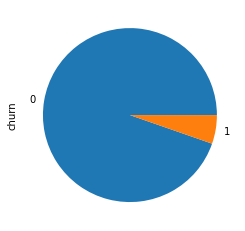

In [47]:
# lets find out churn/non churn percentage
print((telecom_data['churn'].value_counts()/len(telecom_data))*100)
((telecom_data['churn'].value_counts()/len(telecom_data))*100).plot(kind="pie")
plt.show()

#### ***As we can see that 94% of the customers do not churn, there is a possibility of class imbalance*** <br>

Since this variable `churn` is the target variable, all the columns relating to this variable(i.e. all columns with suffix `_9`) can be dropped forn the dataset.

In [48]:
# Selecting all the churn phase columns in order to drop then

churn_phase_cols = [col for col in telecom_data.columns if '_8' in col]
print("The columns from churn phase are:\n",churn_phase_cols)

The columns from churn phase are:
 ['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8']


In [49]:
# Dropping the selected churn phase columns
telecom_data.drop(churn_phase_cols, axis=1, inplace=True)

# The curent dimension of the dataset after dropping the churn related columns
telecom_data.shape

(21013, 98)

We can still clean the data by few possible columns relating to the good phase.

As we derived few columns in the good phase earlier, we can drop those related columns during creation.



In [50]:
telecom_data['total_rech_amt_data_6']=telecom_data['av_rech_amt_data_6'] * telecom_data['total_rech_data_6']
telecom_data['total_rech_amt_data_7']=telecom_data['av_rech_amt_data_7'] * telecom_data['total_rech_data_7']

# # Calculating the overall recharge amount for the months 6,7,8 and 9
telecom_data['overall_rech_amt_6'] = telecom_data['total_rech_amt_data_6'] + telecom_data['total_rech_amt_6']
telecom_data['overall_rech_amt_7'] = telecom_data['total_rech_amt_data_7'] + telecom_data['total_rech_amt_7']

#telecom_data.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
 #                  'total_rech_data_6','total_rech_amt_6',
  #                'total_rech_amt_data_7','av_rech_amt_data_7',
   #                'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

*We can also create new columns for the defining the good phase variables and drop the seperate 6th and 7 month variables.*

<br>**Before proceding to check the remaining missing value handling, let us check the collineartity of the indepedent variables and try to understand their dependencies.**<br>

In [51]:
# creating a list of column names for each month
mon_6_cols = [col for col in telecom_data.columns if '_6' in col]
mon_7_cols = [col for col in telecom_data.columns if '_7' in col]
mon_8_cols = [col for col in telecom_data.columns if '_8' in col]

In [52]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
telecom_data_corr = telecom_data.corr()
telecom_data_corr.loc[:,:] = np.tril(telecom_data_corr, k=-1)
telecom_data_corr = telecom_data_corr.stack()
telecom_data_corr
telecom_data_corr[(telecom_data_corr > 0.80) | (telecom_data_corr < -0.80)].sort_values(ascending=False)

overall_rech_amt_6  total_rech_amt_6         0.976685
total_rech_amt_7    arpu_7                   0.949969
total_rech_amt_6    arpu_6                   0.946338
isd_og_mou_7        isd_og_mou_6             0.936012
overall_rech_amt_6  arpu_6                   0.927121
overall_rech_amt_7  total_rech_amt_7         0.922461
sachet_2g_7         total_rech_data_7        0.905570
sachet_2g_6         total_rech_data_6        0.903036
total_ic_mou_6      loc_ic_mou_6             0.902827
total_ic_mou_7      loc_ic_mou_7             0.884657
overall_rech_amt_7  arpu_7                   0.879783
std_og_t2t_mou_7    onnet_mou_7              0.861739
std_og_t2t_mou_6    onnet_mou_6              0.860859
std_og_t2m_mou_7    offnet_mou_7             0.857504
total_og_mou_7      std_og_mou_7             0.850472
loc_ic_mou_6        loc_ic_t2m_mou_6         0.847022
total_og_mou_6      std_og_mou_6             0.833994
loc_ic_mou_7        loc_ic_t2m_mou_7         0.832532
std_og_t2m_mou_6    offnet_m

In [53]:
col_to_drop=['isd_og_mou_7','total_ic_mou_6',
            'total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_7',
            'std_og_t2m_mou_7']


# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
telecom_data.drop(col_to_drop, axis=1, inplace=True)

In [54]:
# The curent dimension of the dataset after dropping few unwanted columns
telecom_data.shape

(21013, 92)

### Deriving new variables to understand the data


In [55]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
telecom_data['tenure'] = (telecom_data['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
telecom_data.drop('aon',axis=1, inplace=True)

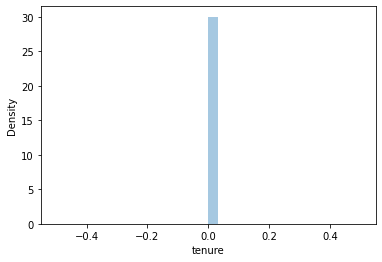

In [56]:
# Checking the distribution of he tenure variable

sns.distplot(telecom_data['tenure'],bins=30)
plt.show()

In [57]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_data['tenure_range'] = pd.cut(telecom_data['tenure'], tn_range, labels=tn_label)
telecom_data['tenure_range'].head()

4     NaN
15    NaN
23    NaN
24    NaN
27    NaN
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

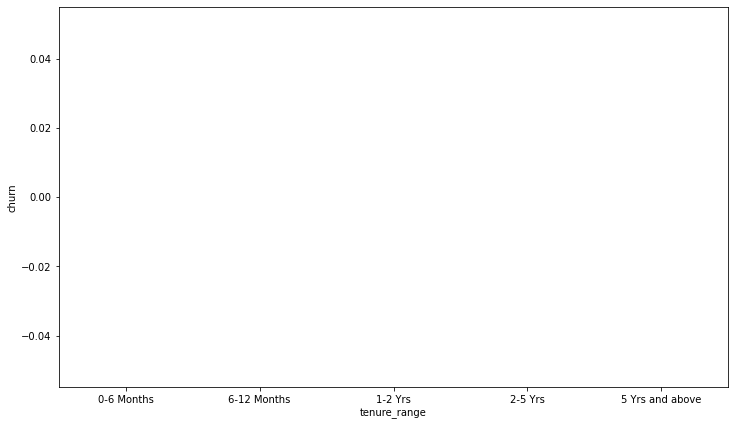

In [58]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=telecom_data)
plt.show()

**It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.**

The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two seperate averages, lets take an average to these two and drop the other columns.

In [59]:
telecom_data["avg_arpu_6_7"]= (telecom_data['arpu_6']+telecom_data['arpu_7'])/2
telecom_data['avg_arpu_6_7'].head()

4     0.061129
15    0.070213
23    0.086638
24    0.066390
27    0.066683
Name: avg_arpu_6_7, dtype: float64

In [60]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

telecom_data.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


# The curent dimension of the dataset after dropping few unwanted columns
telecom_data.shape

(21013, 92)

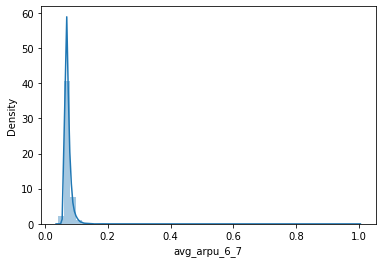

In [61]:
# Visualizing the column created
sns.distplot(telecom_data['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

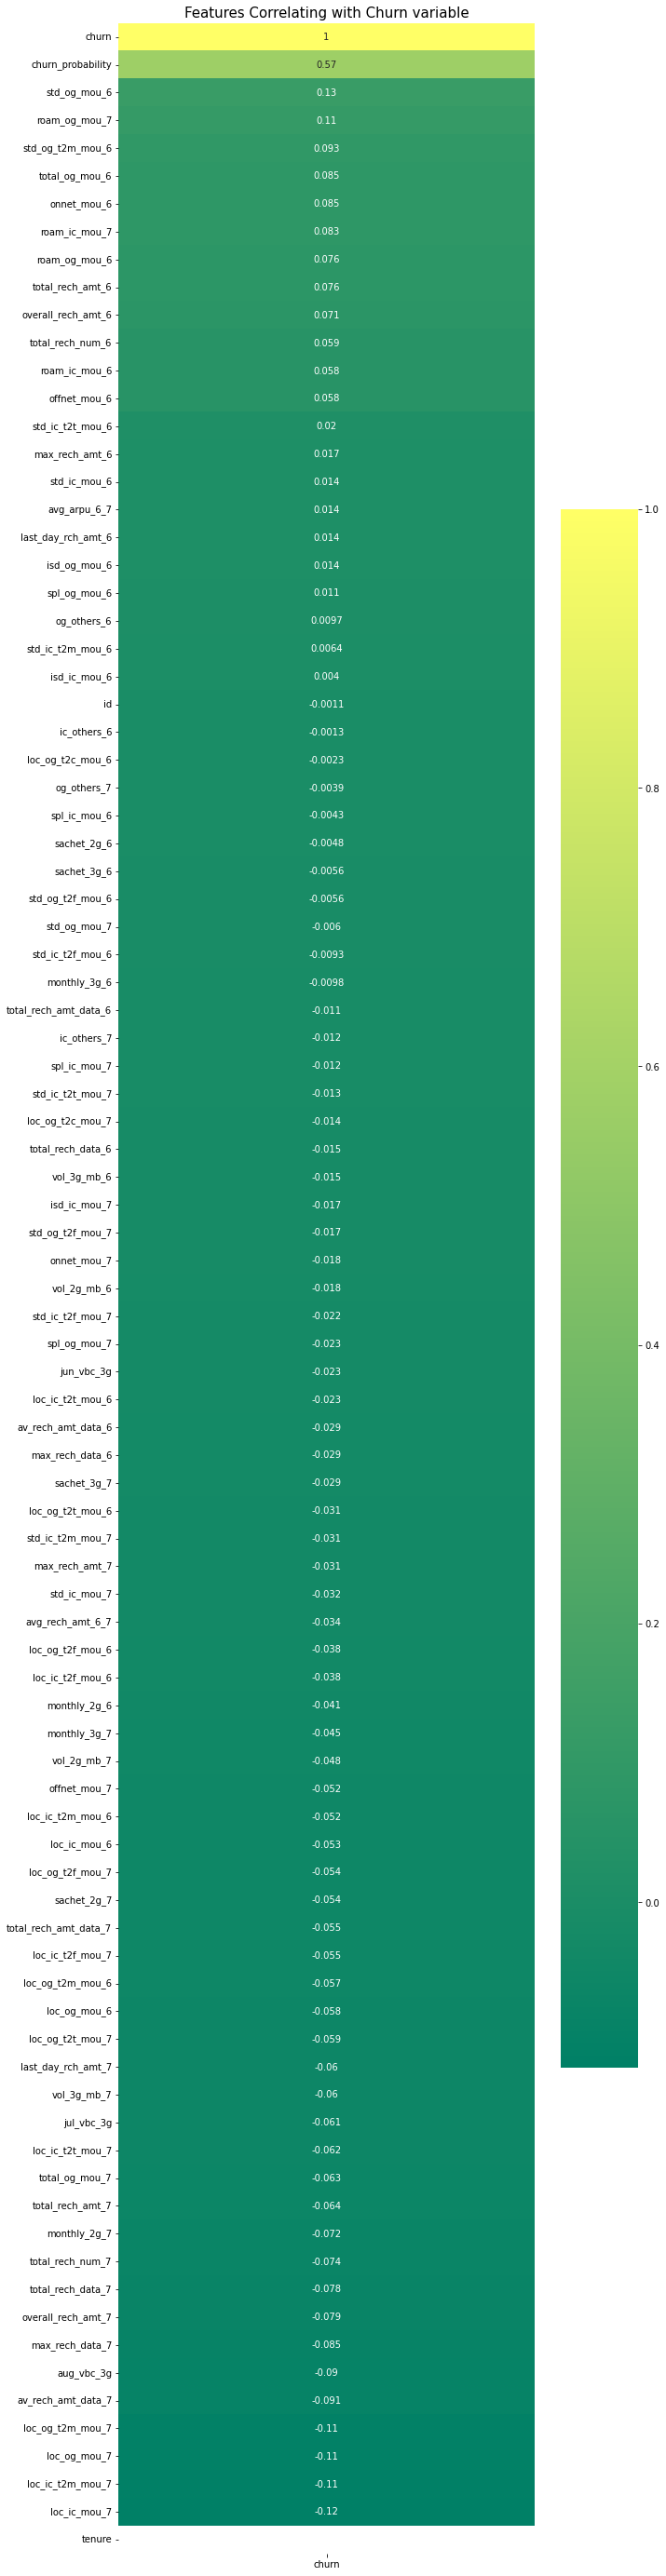

In [62]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(telecom_data.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)


- Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn.
- Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

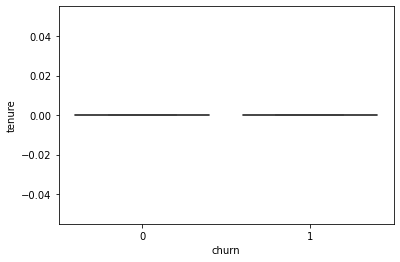

In [63]:
sns.boxplot(x = telecom_data.churn, y = telecom_data.tenure)

plt.show()

**From the above plot , its clear tenured customers do no churn and they keep availing telecom services**

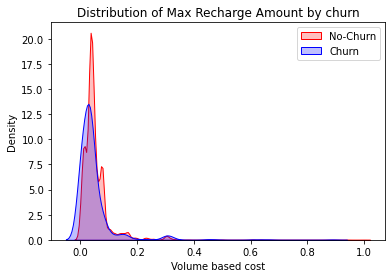

In [64]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(telecom_data.max_rech_amt_7[(telecom_data["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_data.max_rech_amt_7[(telecom_data["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

In [65]:
telecom_data.head()

id  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  \
4   0.000000  0.002885     0.000592     0.006815      0.005410       
15  0.000157  0.001414     0.003063     0.037921      0.048522       
23  0.000271  0.116519     0.045688     0.035093      0.063900       
24  0.000286  0.012632     0.004694     0.063522      0.072084       
27  0.000329  0.001163     0.001407     0.015924      0.022534       

    roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  \
4   0.020526       0.0            0.004167       0.0             
15  0.000000       0.0            0.000000       0.0             
23  0.000000       0.0            0.000000       0.0             
24  0.000000       0.0            0.000000       0.0             
27  0.000000       0.0            0.000000       0.0             

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
4   0.001580          0.000653          0.007822          0.004362           
15  0.001622          0.003377          0.066803          0.072607           
23  0.133647          0.050362          0.016988          0.093179           
24  0.014488          0.005174          0.033914          0.048153           
27  0.001334          0.001551          0.020633          0.032792           

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
4   0.019414          0.001509          0.0               0.017289           
15  0.005279          0.013381          0.0               0.000000           
23  0.018751          0.031190          0.0               0.000000           
24  0.000000          0.000000          0.0               0.000000           
27  0.054584          0.011382          0.0               0.000000           

    loc_og_mou_6  loc_og_mou_7  std_og_t2m_mou_6  std_og_t2f_mou_6  \
4   0.005535      0.003380      0.000523          0.0                
15  0.030767      0.047792      0.000000          0.0                
23  0.089343      0.107206      0.024304          0.0                
24  0.023722      0.033583      0.044726          0.0                
27  0.013079      0.022178      0.000304          0.0                

    std_og_t2f_mou_7  std_og_mou_6  std_og_mou_7  isd_og_mou_6  spl_og_mou_6  \
4   0.0               0.000516      0.000000      0.0           0.000000       
15  0.0               0.000000      0.000000      0.0           0.000078       
23  0.0               0.023963      0.000000      0.0           0.000000       
24  0.0               0.044099      0.035351      0.0           0.000000       
27  0.0               0.000300      0.000000      0.0           0.000000       

    spl_og_mou_7  og_others_6  og_others_7  total_og_mou_6  total_og_mou_7  \
4   0.01343       0.000000     0.0          0.005927        0.005182         
15  0.00000       0.000164     0.0          0.030695        0.044268         
23  0.00004       0.000000     0.0          0.108018        0.099308         
24  0.00000       0.000000     0.0          0.058495        0.065904         
27  0.00000       0.000000     0.0          0.013279        0.020543         

    loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  \
4   0.001247          0.000243          0.002377          0.001075           
15  0.003176          0.003534          0.049275          0.187294           
23  0.053456          0.020602          0.027811          0.069155           
24  0.012028          0.006627          0.038333          0.026498           
27  0.011856          0.014682          0.028986          0.053263           

    loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_mou_6  loc_ic_mou_7  \
4   0.004013          0.001831          0.002889      0.001447       
15  0.000000          0.000973          0.031280      0.120054       
23  0.024987          0.026263          0.052502      0.069310       
24  0.000000          0.000772          0.029929      0.022591       
27  0.063565          0.034135          0.035956      0.056602  

In [66]:
# Creating categories for month 8 column totalrecharge and their count
telecom_data['total_rech_data_group_7']=pd.cut(telecom_data['total_rech_data_7'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
telecom_data['total_rech_num_group_7']=pd.cut(telecom_data['total_rech_num_7'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_7 variable
 <=10_Recharges     11919
No_Recharge        9094 
10-25_Recharges    0    
>25_Recharges      0    
Name: total_rech_data_group_7, dtype: int64


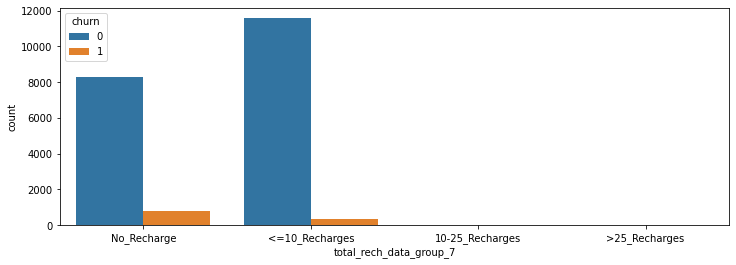

					Distribution of total_rech_num_7 variable
 <=10_Recharges     20945
No_Recharge        68   
10-25_Recharges    0    
>25_Recharges      0    
Name: total_rech_num_group_7, dtype: int64


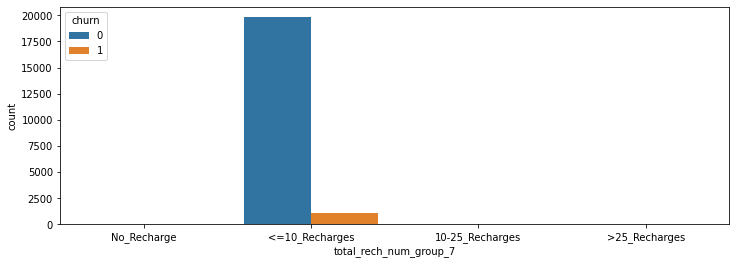

In [67]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=telecom_data,x="total_rech_data_group_7",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_7 variable\n",telecom_data['total_rech_data_group_7'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=telecom_data,x="total_rech_num_group_7",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_7 variable\n",telecom_data['total_rech_num_group_7'].value_counts())
plt.show()

As the number of recharge rate increases, the churn rate decreases clearly.

In [68]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(telecom_data[['total_rech_data_group_7','total_rech_num_group_7','tenure_range']], drop_first=True)
dummy.head()

total_rech_data_group_7_<=10_Recharges  \
4   1                                        
15  0                                        
23  0                                        
24  1                                        
27  1                                        

    total_rech_data_group_7_10-25_Recharges  \
4   0                                         
15  0                                         
23  0                                         
24  0                                         
27  0                                         

    total_rech_data_group_7_>25_Recharges  \
4   0                                       
15  0                                       
23  0                                       
24  0                                       
27  0                                       

    total_rech_num_group_7_<=10_Recharges  \
4   1                                       
15  1                                       
23  1                                       
24  1                                       
27  1                                       

    total_rech_num_group_7_10-25_Recharges  \
4   0                                        
15  0                                        
23  0                                        
24  0                                        
27  0                                        

    total_rech_num_group_7_>25_Recharges  tenure_range_6-12 Months  \
4   0                                     0                          
15  0                                     0                          
23  0                                     0                          
24  0                                     0                          
27  0                                     0                          

    tenure_range_1-2 Yrs  tenure_range_2-5 Yrs  tenure_range_5 Yrs and above  
4   0                     0                     0                             
15  0                     0                     0                             
23  0                     0                     0                             
24  0                     0                     0                             
27  0                     0                     0

In [69]:
# Adding the results to the master dataframe
telecom_data = pd.concat([telecom_data, dummy], axis=1)
telecom_data.head()

id  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  \
4   0.000000  0.002885     0.000592     0.006815      0.005410       
15  0.000157  0.001414     0.003063     0.037921      0.048522       
23  0.000271  0.116519     0.045688     0.035093      0.063900       
24  0.000286  0.012632     0.004694     0.063522      0.072084       
27  0.000329  0.001163     0.001407     0.015924      0.022534       

    roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  \
4   0.020526       0.0            0.004167       0.0             
15  0.000000       0.0            0.000000       0.0             
23  0.000000       0.0            0.000000       0.0             
24  0.000000       0.0            0.000000       0.0             
27  0.000000       0.0            0.000000       0.0             

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
4   0.001580          0.000653          0.007822          0.004362           
15  0.001622          0.003377          0.066803          0.072607           
23  0.133647          0.050362          0.016988          0.093179           
24  0.014488          0.005174          0.033914          0.048153           
27  0.001334          0.001551          0.020633          0.032792           

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
4   0.019414          0.001509          0.0               0.017289           
15  0.005279          0.013381          0.0               0.000000           
23  0.018751          0.031190          0.0               0.000000           
24  0.000000          0.000000          0.0               0.000000           
27  0.054584          0.011382          0.0               0.000000           

    loc_og_mou_6  loc_og_mou_7  std_og_t2m_mou_6  std_og_t2f_mou_6  \
4   0.005535      0.003380      0.000523          0.0                
15  0.030767      0.047792      0.000000          0.0                
23  0.089343      0.107206      0.024304          0.0                
24  0.023722      0.033583      0.044726          0.0                
27  0.013079      0.022178      0.000304          0.0                

    std_og_t2f_mou_7  std_og_mou_6  std_og_mou_7  isd_og_mou_6  spl_og_mou_6  \
4   0.0               0.000516      0.000000      0.0           0.000000       
15  0.0               0.000000      0.000000      0.0           0.000078       
23  0.0               0.023963      0.000000      0.0           0.000000       
24  0.0               0.044099      0.035351      0.0           0.000000       
27  0.0               0.000300      0.000000      0.0           0.000000       

    spl_og_mou_7  og_others_6  og_others_7  total_og_mou_6  total_og_mou_7  \
4   0.01343       0.000000     0.0          0.005927        0.005182         
15  0.00000       0.000164     0.0          0.030695        0.044268         
23  0.00004       0.000000     0.0          0.108018        0.099308         
24  0.00000       0.000000     0.0          0.058495        0.065904         
27  0.00000       0.000000     0.0          0.013279        0.020543         

    loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  \
4   0.001247          0.000243          0.002377          0.001075           
15  0.003176          0.003534          0.049275          0.187294           
23  0.053456          0.020602          0.027811          0.069155           
24  0.012028          0.006627          0.038333          0.026498           
27  0.011856          0.014682          0.028986          0.053263           

    loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_mou_6  loc_ic_mou_7  \
4   0.004013          0.001831          0.002889      0.001447       
15  0.000000          0.000973          0.031280      0.120054       
23  0.024987          0.026263          0.052502      0.069310       
24  0.000000          0.000772          0.029929      0.022591       
27  0.063565          0.034135          0.035956      0.056602  

In [70]:
# Creating a copy of the filtered dataframe

df=telecom_data[:].copy()

# Dropping unwanted columns
df.drop(['tenure_range','tenure'], axis=1, inplace=True)

In [71]:
# Cheking the dataset
df.head()

id  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  \
4   0.000000  0.002885     0.000592     0.006815      0.005410       
15  0.000157  0.001414     0.003063     0.037921      0.048522       
23  0.000271  0.116519     0.045688     0.035093      0.063900       
24  0.000286  0.012632     0.004694     0.063522      0.072084       
27  0.000329  0.001163     0.001407     0.015924      0.022534       

    roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  \
4   0.020526       0.0            0.004167       0.0             
15  0.000000       0.0            0.000000       0.0             
23  0.000000       0.0            0.000000       0.0             
24  0.000000       0.0            0.000000       0.0             
27  0.000000       0.0            0.000000       0.0             

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
4   0.001580          0.000653          0.007822          0.004362           
15  0.001622          0.003377          0.066803          0.072607           
23  0.133647          0.050362          0.016988          0.093179           
24  0.014488          0.005174          0.033914          0.048153           
27  0.001334          0.001551          0.020633          0.032792           

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
4   0.019414          0.001509          0.0               0.017289           
15  0.005279          0.013381          0.0               0.000000           
23  0.018751          0.031190          0.0               0.000000           
24  0.000000          0.000000          0.0               0.000000           
27  0.054584          0.011382          0.0               0.000000           

    loc_og_mou_6  loc_og_mou_7  std_og_t2m_mou_6  std_og_t2f_mou_6  \
4   0.005535      0.003380      0.000523          0.0                
15  0.030767      0.047792      0.000000          0.0                
23  0.089343      0.107206      0.024304          0.0                
24  0.023722      0.033583      0.044726          0.0                
27  0.013079      0.022178      0.000304          0.0                

    std_og_t2f_mou_7  std_og_mou_6  std_og_mou_7  isd_og_mou_6  spl_og_mou_6  \
4   0.0               0.000516      0.000000      0.0           0.000000       
15  0.0               0.000000      0.000000      0.0           0.000078       
23  0.0               0.023963      0.000000      0.0           0.000000       
24  0.0               0.044099      0.035351      0.0           0.000000       
27  0.0               0.000300      0.000000      0.0           0.000000       

    spl_og_mou_7  og_others_6  og_others_7  total_og_mou_6  total_og_mou_7  \
4   0.01343       0.000000     0.0          0.005927        0.005182         
15  0.00000       0.000164     0.0          0.030695        0.044268         
23  0.00004       0.000000     0.0          0.108018        0.099308         
24  0.00000       0.000000     0.0          0.058495        0.065904         
27  0.00000       0.000000     0.0          0.013279        0.020543         

    loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  \
4   0.001247          0.000243          0.002377          0.001075           
15  0.003176          0.003534          0.049275          0.187294           
23  0.053456          0.020602          0.027811          0.069155           
24  0.012028          0.006627          0.038333          0.026498           
27  0.011856          0.014682          0.028986          0.053263           

    loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_mou_6  loc_ic_mou_7  \
4   0.004013          0.001831          0.002889      0.001447       
15  0.000000          0.000973          0.031280      0.120054       
23  0.024987          0.026263          0.052502      0.069310       
24  0.000000          0.000772          0.029929      0.022591       
27  0.063565          0.034135          0.035956      0.056602  

In [72]:
# lets create X dataset for model building.
X = df.drop(['churn'],axis=1)

In [73]:
X.head()

id  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  \
4   0.000000  0.002885     0.000592     0.006815      0.005410       
15  0.000157  0.001414     0.003063     0.037921      0.048522       
23  0.000271  0.116519     0.045688     0.035093      0.063900       
24  0.000286  0.012632     0.004694     0.063522      0.072084       
27  0.000329  0.001163     0.001407     0.015924      0.022534       

    roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  \
4   0.020526       0.0            0.004167       0.0             
15  0.000000       0.0            0.000000       0.0             
23  0.000000       0.0            0.000000       0.0             
24  0.000000       0.0            0.000000       0.0             
27  0.000000       0.0            0.000000       0.0             

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
4   0.001580          0.000653          0.007822          0.004362           
15  0.001622          0.003377          0.066803          0.072607           
23  0.133647          0.050362          0.016988          0.093179           
24  0.014488          0.005174          0.033914          0.048153           
27  0.001334          0.001551          0.020633          0.032792           

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
4   0.019414          0.001509          0.0               0.017289           
15  0.005279          0.013381          0.0               0.000000           
23  0.018751          0.031190          0.0               0.000000           
24  0.000000          0.000000          0.0               0.000000           
27  0.054584          0.011382          0.0               0.000000           

    loc_og_mou_6  loc_og_mou_7  std_og_t2m_mou_6  std_og_t2f_mou_6  \
4   0.005535      0.003380      0.000523          0.0                
15  0.030767      0.047792      0.000000          0.0                
23  0.089343      0.107206      0.024304          0.0                
24  0.023722      0.033583      0.044726          0.0                
27  0.013079      0.022178      0.000304          0.0                

    std_og_t2f_mou_7  std_og_mou_6  std_og_mou_7  isd_og_mou_6  spl_og_mou_6  \
4   0.0               0.000516      0.000000      0.0           0.000000       
15  0.0               0.000000      0.000000      0.0           0.000078       
23  0.0               0.023963      0.000000      0.0           0.000000       
24  0.0               0.044099      0.035351      0.0           0.000000       
27  0.0               0.000300      0.000000      0.0           0.000000       

    spl_og_mou_7  og_others_6  og_others_7  total_og_mou_6  total_og_mou_7  \
4   0.01343       0.000000     0.0          0.005927        0.005182         
15  0.00000       0.000164     0.0          0.030695        0.044268         
23  0.00004       0.000000     0.0          0.108018        0.099308         
24  0.00000       0.000000     0.0          0.058495        0.065904         
27  0.00000       0.000000     0.0          0.013279        0.020543         

    loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  \
4   0.001247          0.000243          0.002377          0.001075           
15  0.003176          0.003534          0.049275          0.187294           
23  0.053456          0.020602          0.027811          0.069155           
24  0.012028          0.006627          0.038333          0.026498           
27  0.011856          0.014682          0.028986          0.053263           

    loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_mou_6  loc_ic_mou_7  \
4   0.004013          0.001831          0.002889      0.001447       
15  0.000000          0.000973          0.031280      0.120054       
23  0.024987          0.026263          0.052502      0.069310       
24  0.000000          0.000772          0.029929      0.022591       
27  0.063565          0.034135          0.035956      0.056602  

In [74]:
# lets create y dataset for model building.
y=df['churn']
y.head()

4     0
15    0
23    0
24    0
27    0
Name: churn, dtype: int32

In [75]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (14709, 101)
Dimension of X_test: (6304, 101)


In [76]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14709 entries, 28068 to 791
Data columns (total 101 columns):
 #    Column                                   Dtype   
---   ------                                   -----   
 0    id                                       float64 
 1    onnet_mou_6                              float64 
 2    onnet_mou_7                              float64 
 3    offnet_mou_6                             float64 
 4    offnet_mou_7                             float64 
 5    roam_ic_mou_6                            float64 
 6    roam_ic_mou_7                            float64 
 7    roam_og_mou_6                            float64 
 8    roam_og_mou_7                            float64 
 9    loc_og_t2t_mou_6                         float64 
 10   loc_og_t2t_mou_7                         float64 
 11   loc_og_t2m_mou_6                         float64 
 12   loc_og_t2m_mou_7                         float64 
 13   loc_og_t2f_mou_6                         f

In [77]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [78]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [79]:
X_train.head()

id  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  \
28068  0.400954  0.004011     0.000409     0.035526      0.018057       
34320  0.490278  0.024694     0.011582     0.097408      0.117076       
47685  0.681225  0.008897     0.032905     0.012989      0.041636       
15402  0.219993  0.020468     0.012983     0.017197      0.011526       
24936  0.356207  0.107445     0.098114     0.007170      0.014195       

       roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  \
28068  0.000000       0.000000       0.000000       0.000000        
34320  0.000000       0.003907       0.000000       0.003312        
47685  0.006452       0.000000       0.015532       0.000000        
15402  0.010156       0.000000       0.003681       0.000000        
24936  0.000000       0.000000       0.000000       0.000000        

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
28068  0.004601          0.000559          0.045081          0.041094           
34320  0.005136          0.003841          0.131995          0.276433           
47685  0.001284          0.001928          0.012787          0.075646           
15402  0.004537          0.002224          0.022368          0.027805           
24936  0.034551          0.035794          0.007518          0.026438           

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
28068  0.000000          0.000000          0.021965          0.003618           
34320  0.000516          0.001079          0.000000          0.000000           
47685  0.000000          0.000000          0.000000          0.000000           
15402  0.003046          0.001153          0.017504          0.001918           
24936  0.004927          0.005924          0.000000          0.000000           

       loc_og_mou_6  loc_og_mou_7  std_og_t2m_mou_6  std_og_t2f_mou_6  \
28068  0.022675      0.018749      0.000000          0.000000           
34320  0.061382      0.126323      0.005876          0.000875           
47685  0.006420      0.035364      0.000592          0.000000           
15402  0.012785      0.014593      0.000491          0.000000           
24936  0.024474      0.046558      0.001597          0.001368           

       std_og_t2f_mou_7  std_og_mou_6  std_og_mou_7  isd_og_mou_6  \
28068  0.000000          0.000000      0.000483      0.0            
34320  0.002062          0.024370      0.014817      0.0            
47685  0.000000          0.004719      0.041648      0.0            
15402  0.000000          0.015349      0.011444      0.0            
24936  0.001654          0.077384      0.074591      0.0            

       spl_og_mou_6  spl_og_mou_7  og_others_6  og_others_7  total_og_mou_6  \
28068  0.059755      0.007980      0.000000     0.0          0.025115         
34320  0.000000      0.000071      0.000000     0.0          0.078325         
47685  0.001855      0.001253      0.002837     0.0          0.009957         
15402  0.008070      0.001982      0.000000     0.0          0.023870         
24936  0.000000      0.000809      0.000000     0.0          0.078764         

       total_og_mou_7  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  \
28068  0.015755        0.011444          0.007004          0.059379           
34320  0.110234        0.008286          0.000751          0.024111           
47685  0.067940        0.002619          0.000881          0.009989           
15402  0.022582        0.002230          0.003046          0.012793           
24936  0.108780        0.002484          0.004827          0.015678           

       loc_ic_t2m_mou_7  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_mou_6  \
28068  0.035247          0.000000          0.000000          0.042152       
34320  0.016739          0.001692          0.001192          0.019549       
47685  0.025895          0.000000          0.000510          0.007497       
15402  0.014194          0.001216          0.001371          0.009161    

In [80]:
X_train.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'total_rech_amt_data_7','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7',
                  'total_rech_num_group_7',], axis=1, inplace=True)

In [81]:
X_train.drop(['total_rech_data_group_7'],axis=1, inplace=True)

In [82]:
X_train.head()

id  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  \
28068  0.400954  0.004011     0.000409     0.035526      0.018057       
34320  0.490278  0.024694     0.011582     0.097408      0.117076       
47685  0.681225  0.008897     0.032905     0.012989      0.041636       
15402  0.219993  0.020468     0.012983     0.017197      0.011526       
24936  0.356207  0.107445     0.098114     0.007170      0.014195       

       roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  \
28068  0.000000       0.000000       0.000000       0.000000        
34320  0.000000       0.003907       0.000000       0.003312        
47685  0.006452       0.000000       0.015532       0.000000        
15402  0.010156       0.000000       0.003681       0.000000        
24936  0.000000       0.000000       0.000000       0.000000        

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
28068  0.004601          0.000559          0.045081          0.041094           
34320  0.005136          0.003841          0.131995          0.276433           
47685  0.001284          0.001928          0.012787          0.075646           
15402  0.004537          0.002224          0.022368          0.027805           
24936  0.034551          0.035794          0.007518          0.026438           

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
28068  0.000000          0.000000          0.021965          0.003618           
34320  0.000516          0.001079          0.000000          0.000000           
47685  0.000000          0.000000          0.000000          0.000000           
15402  0.003046          0.001153          0.017504          0.001918           
24936  0.004927          0.005924          0.000000          0.000000           

       loc_og_mou_6  loc_og_mou_7  std_og_t2m_mou_6  std_og_t2f_mou_6  \
28068  0.022675      0.018749      0.000000          0.000000           
34320  0.061382      0.126323      0.005876          0.000875           
47685  0.006420      0.035364      0.000592          0.000000           
15402  0.012785      0.014593      0.000491          0.000000           
24936  0.024474      0.046558      0.001597          0.001368           

       std_og_t2f_mou_7  std_og_mou_6  std_og_mou_7  isd_og_mou_6  \
28068  0.000000          0.000000      0.000483      0.0            
34320  0.002062          0.024370      0.014817      0.0            
47685  0.000000          0.004719      0.041648      0.0            
15402  0.000000          0.015349      0.011444      0.0            
24936  0.001654          0.077384      0.074591      0.0            

       spl_og_mou_6  spl_og_mou_7  og_others_6  og_others_7  total_og_mou_6  \
28068  0.059755      0.007980      0.000000     0.0          0.025115         
34320  0.000000      0.000071      0.000000     0.0          0.078325         
47685  0.001855      0.001253      0.002837     0.0          0.009957         
15402  0.008070      0.001982      0.000000     0.0          0.023870         
24936  0.000000      0.000809      0.000000     0.0          0.078764         

       total_og_mou_7  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  \
28068  0.015755        0.011444          0.007004          0.059379           
34320  0.110234        0.008286          0.000751          0.024111           
47685  0.067940        0.002619          0.000881          0.009989           
15402  0.022582        0.002230          0.003046          0.012793           
24936  0.108780        0.002484          0.004827          0.015678           

       loc_ic_t2m_mou_7  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_mou_6  \
28068  0.035247          0.000000          0.000000          0.042152       
34320  0.016739          0.001692          0.001192          0.019549       
47685  0.025895          0.000000          0.000510          0.007497       
15402  0.014194          0.001216          0.001371          0.009161    

### Data Imbalance Handling

**Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further**

In [83]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [84]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (27830, 91)
Dimension of y_train_sm Shape: (27830,)


### Logistic Regression

In [85]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [86]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                27830
Model:                            GLM   Df Residuals:                    27746
Model Family:                Binomial   Df Model:                           83
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7084.8
Date:                Wed, 02 Mar 2022   Deviance:                       14170.
Time:                        09:22:59   Pearson chi2:                 2.05e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.0873      0.329     -0.266      0.791      -0.731       0.557
id                                          0.0622      0.078      0.796      0.426      -0.091       0.215
onnet_mou_6                                59.0840     20.225      2.921      0.003      19.444      98.724
onnet_mou_7                              -145.5494     32.708     -4.450      0.000    -209.655     -81.444
offnet_mou_6                               13.8473     17.851      0.776      0.438     -21.140      48.835
offnet_mou_7                             -132.6290     28.235     -4.697      0.000    -187.968     -77.289
roam_ic_mou_6                              -4.7571      0.924     -5.150      0.000      -6.568      -2.947
roam_ic_mou_7                               6.4950      1.609      4.037      0.000       3.342       9.648
roam_og_mou_6                             -16.3508      8.511     -1.921      0.055     -33.031       0.330
roam_og_mou_7                              35.2463      7.048      5.001      0.000      21.432      49.061
loc_og_t2t_mou_6                         1.685e+05   2.85e+04      5.904      0.000    1.13e+05    2.24e+05
loc_og_t2t_mou_7                         1.727e+05   2.57e+04      6.708      0.000    1.22e+05    2.23e+05
loc_og_t2m_mou_6                         1.231e+05   2.08e+04      5.905      0.000    8.22e+04    1.64e+05
loc_og_t2m_mou_7                         8.043e+04    1.2e+04      6.708      0.000    5.69e+04    1.04e+05
loc_og_t2f_mou_6                         1.575e+04   2666.377      5.906      0.000    1.05e+04     2.1e+04
loc_og_t2f_mou_7                         2.358e+04   3516.112      6.706      0.000    1.67e+04    3.05e+04
loc_og_t2c_mou_6                           -0.0463      1.186     -0.039      0.969      -2.371       2.278
loc_og_t2c_mou_7                           -6.3178      2.744     -2.302      0.021     -11.697      -0.939
loc_og_mou_6                             -3.83e+05    5.8e+04     -6.604      0.000   -4.97e+05   -2.69e+05
loc_og_mou_7                            -1.814e+05   2.71e+04     -6.705      0.000   -2.34e+05   -1.28e+05
std_og_t2m_mou_6                           36.4706      3.551     10.270      0.000      29.511      43.431
std_og_t2f_mou_6                           -3.3953      2.254     -1.507      0.132      -7.812       1.022
std_og_t2f_mou_7                            1.9616      1.350      1.453      0.146      -0.685       4.609
std_og_mou_6                            -7.338e+04   2.61e+04     -2.816      0.005   -1.24e+05   -2.23e+04
std_og_mou_7                               87.7082     31.727      2.764      0.006      25.524     149.893
isd_og_mou_6                            -5.773e+04   2.05e+

#### Logistic Regression using Feature Selection (RFE method)

In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [88]:
rfe.support_

array([False,  True, False, False,  True,  True,  True, False,  True,
        True,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True, False,  True, False, False, False,  True, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [89]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['onnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6',
       'std_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'total_og_mou_6',
       'total_og_mou_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'spl_ic_mou_6',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'total_rech_num_7',
       'last_day_rch_amt_7', 'vol_2g_mb_7', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_6',
       'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'aug_vbc_3g',
       'jul_vbc_3g', 'churn_probability'],
      dtype='object')


In [90]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('id', False, 37),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', False, 25),
 ('offnet_mou_6', False, 39),
 ('offnet_mou_7', True, 1),
 ('roam_ic_mou_6', True, 1),
 ('roam_ic_mou_7', True, 1),
 ('roam_og_mou_6', False, 15),
 ('roam_og_mou_7', True, 1),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2m_mou_6', False, 36),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2f_mou_6', False, 13),
 ('loc_og_t2f_mou_7', True, 1),
 ('loc_og_t2c_mou_6', False, 18),
 ('loc_og_t2c_mou_7', True, 1),
 ('loc_og_mou_6', False, 5),
 ('loc_og_mou_7', True, 1),
 ('std_og_t2m_mou_6', True, 1),
 ('std_og_t2f_mou_6', True, 1),
 ('std_og_t2f_mou_7', False, 26),
 ('std_og_mou_6', True, 1),
 ('std_og_mou_7', True, 1),
 ('isd_og_mou_6', False, 32),
 ('spl_og_mou_6', True, 1),
 ('spl_og_mou_7', True, 1),
 ('og_others_6', False, 31),
 ('og_others_7', False, 38),
 ('total_og_mou_6', True, 1),
 ('total_og_mou_7', True, 1),
 ('loc_ic_t2t_mou_6', True, 1),
 ('loc_ic_t2t_mou_7', True, 1),
 ('loc_

##### Assessing the model with StatsModels

In [91]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                27830
Model:                            GLM   Df Residuals:                    27784
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7272.5
Date:                Wed, 02 Mar 2022   Deviance:                       14545.
Time:                        09:23:45   Pearson chi2:                 5.19e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5751      0.062      9.242      0.000       0.453       0.697
onnet_mou_6           19.6080      3.312      5.920      0.000      13.117      26.099
offnet_mou_7          -7.1443      0.955     -7.481      0.000      -9.016      -5.273
roam_ic_mou_6         -6.4337      0.718     -8.963      0.000      -7.841      -5.027
roam_ic_mou_7          8.5687      1.564      5.478      0.000       5.503      11.635
roam_og_mou_7          2.7566      0.562      4.901      0.000       1.654       3.859
loc_og_t2t_mou_6     -14.3156      3.990     -3.588      0.000     -22.137      -6.495
loc_og_t2t_mou_7    1.911e+05   2.45e+04      7.810      0.000    1.43e+05    2.39e+05
loc_og_t2m_mou_7    8.898e+04   1.14e+04      7.811      0.000    6.67e+04    1.11e+05
loc_og_t2f_mou_7    2.609e+04   3340.758      7.810      0.000    1.95e+04    3.26e+04
loc_og_t2c_mou_7      -5.8627      2.443     -2.400      0.016     -10.651      -1.074
loc_og_mou_7       -2.007e+05   2.57e+04     -7.810      0.000   -2.51e+05    -1.5e+05
std_og_t2m_mou_6      17.6064      2.539      6.935      0.000      12.630      22.583
std_og_t2f_mou_6      -3.2096      1.905     -1.685      0.092      -6.943       0.523
std_og_mou_6         -10.7271      3.667     -2.925      0.003     -17.914      -3.540
std_og_mou_7           1.5320     14.064      0.109      0.913     -26.032      29.096
spl_og_mou_6          -0.6448      0.908     -0.710      0.478      -2.425       1.136
spl_og_mou_7          -7.6629      3.549     -2.159      0.031     -14.618      -0.708
total_og_mou_6        -1.5792      2.065     -0.765      0.444      -5.626       2.468
total_og_mou_7        -9.2967     14.317     -0.649      0.516     -37.357      18.763
loc_ic_t2t_mou_6       8.4134      1.409      5.969      0.000       5.651      11.176
loc_ic_t2t_mou_7    3.053e+05   2.24e+04     13.628      0.000    2.61e+05    3.49e+05
loc_ic_t2m_mou_7    2.154e+05   1.58e+04     13.628      0.000    1.84e+05    2.46e+05
loc_ic_t2f_mou_6       4.2660      1.564      2.727      0.006       1.200       7.332
loc_ic_t2f_mou_7     7.45e+04   5467.078     13.626      0.000    6.38e+04    8.52e+04
loc_ic_mou_7       -3.458e+05   2.54e+04    -13.628      0.000   -3.96e+05   -2.96e+05
std_ic_t2m_mou_7      -1.9634      1.097     -1.790      0.073      -4.114       0.187
std_ic_t2f_mou_7      -4.5060      2.956     -1.524      0.127     -10.300       1.287
spl_ic_mou_6          -2.2035      0.459     -4.805      0.000      -3.102      -1.305
isd_ic_mou_6          -2.9585      1.843     -1.605      0.108      -6.571       0.654
isd_ic_mou_7          -1.1899      1.770     -0.672      0.501      -4.660       2.280
total_rech_num_7      -2.8071      0.469     -5.981      0.000      -3.727      -1.887
last_day_rch_amt_7    -2.5726      0.6

In [94]:
# From the p-value of the individual columns, 
    # we can drop the column 'std_og_mou_7' as it has high p-value 
rfe_columns_1=rfe_columns.drop('std_og_mou_7',1)
print("\nThe new set of edited featured are:\n",rfe_columns_1)


The new set of edited featured are:
 Index(['onnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6',
       'spl_og_mou_6', 'spl_og_mou_7', 'total_og_mou_6', 'total_og_mou_7',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'spl_ic_mou_6', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'total_rech_num_7', 'last_day_rch_amt_7', 'vol_2g_mb_7',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'monthly_2g_6', 'monthly_2g_7',
       'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6',
       'sachet_3g_7', 'aug_vbc_3g', 'jul_vbc_3g', 'churn_probability'],
      dtype='object')


In [95]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                27830
Model:                            GLM   Df Residuals:                    27785
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7272.5
Date:                Wed, 02 Mar 2022   Deviance:                       14545.
Time:                        09:25:20   Pearson chi2:                 5.20e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5750      0.062      9.243      0.000       0.453       0.697
onnet_mou_6           19.6125      3.312      5.922      0.000      13.122      26.103
offnet_mou_7          -7.1463      0.955     -7.485      0.000      -9.018      -5.275
roam_ic_mou_6         -6.4336      0.718     -8.963      0.000      -7.840      -5.027
roam_ic_mou_7          8.5694      1.564      5.478      0.000       5.503      11.635
roam_og_mou_7          2.7577      0.562      4.903      0.000       1.655       3.860
loc_og_t2t_mou_6     -14.3046      3.989     -3.586      0.000     -22.123      -6.486
loc_og_t2t_mou_7     1.91e+05   2.45e+04      7.809      0.000    1.43e+05    2.39e+05
loc_og_t2m_mou_7    8.897e+04   1.14e+04      7.810      0.000    6.66e+04    1.11e+05
loc_og_t2f_mou_7    2.609e+04   3340.465      7.809      0.000    1.95e+04    3.26e+04
loc_og_t2c_mou_7      -5.8656      2.443     -2.401      0.016     -10.654      -1.077
loc_og_mou_7       -2.007e+05   2.57e+04     -7.810      0.000   -2.51e+05    -1.5e+05
std_og_t2m_mou_6      17.6109      2.539      6.937      0.000      12.635      22.586
std_og_t2f_mou_6      -3.2088      1.905     -1.685      0.092      -6.942       0.524
std_og_mou_6         -10.7211      3.666     -2.924      0.003     -17.907      -3.535
spl_og_mou_6          -0.6440      0.908     -0.709      0.478      -2.425       1.137
spl_og_mou_7          -7.8734      2.976     -2.645      0.008     -13.707      -2.040
total_og_mou_6        -1.5928      2.061     -0.773      0.440      -5.632       2.447
total_og_mou_7        -7.7391      0.739    -10.474      0.000      -9.187      -6.291
loc_ic_t2t_mou_6       8.4166      1.409      5.972      0.000       5.654      11.179
loc_ic_t2t_mou_7    3.054e+05   2.24e+04     13.630      0.000    2.61e+05    3.49e+05
loc_ic_t2m_mou_7    2.154e+05   1.58e+04     13.630      0.000    1.84e+05    2.46e+05
loc_ic_t2f_mou_6       4.2710      1.563      2.732      0.006       1.207       7.335
loc_ic_t2f_mou_7     7.45e+04   5466.672     13.629      0.000    6.38e+04    8.52e+04
loc_ic_mou_7       -3.459e+05   2.54e+04    -13.631      0.000   -3.96e+05   -2.96e+05
std_ic_t2m_mou_7      -1.9610      1.097     -1.788      0.074      -4.111       0.189
std_ic_t2f_mou_7      -4.5061      2.956     -1.524      0.127     -10.300       1.287
spl_ic_mou_6          -2.2029      0.459     -4.804      0.000      -3.102      -1.304
isd_ic_mou_6          -2.9590      1.844     -1.604      0.109      -6.574       0.656
isd_ic_mou_7          -1.2166      1.756     -0.693      0.488      -4.658       2.225
total_rech_num_7      -2.8087      0.469     -5.988      0.000      -3.728      -1.889
last_day_rch_amt_7    -2.5763      0.643     -4.009      0.000      -3.836      -1.317
vol_2g_mb_7           -3.3482      0.5

In [96]:
# From the p-value of the individual columns, 
    # we can drop the column 'isd_ic_mou_7' as it has high p-value 
rfe_columns_2=rfe_columns_1.drop('isd_ic_mou_7',1)
print("\nThe new set of edited featured are:\n",rfe_columns_2)


The new set of edited featured are:
 Index(['onnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6',
       'spl_og_mou_6', 'spl_og_mou_7', 'total_og_mou_6', 'total_og_mou_7',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'spl_ic_mou_6', 'isd_ic_mou_6',
       'total_rech_num_7', 'last_day_rch_amt_7', 'vol_2g_mb_7', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7',
       'aug_vbc_3g', 'jul_vbc_3g', 'churn_probability'],
      dtype='object')


In [97]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_2])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                27830
Model:                            GLM   Df Residuals:                    27786
Model Family:                Binomial   Df Model:                           43
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7272.8
Date:                Wed, 02 Mar 2022   Deviance:                       14546.
Time:                        09:26:01   Pearson chi2:                 5.21e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5753      0.062      9.249      0.000       0.453       0.697
onnet_mou_6           19.6284      3.311      5.927      0.000      13.138      26.119
offnet_mou_7          -7.1631      0.955     -7.504      0.000      -9.034      -5.292
roam_ic_mou_6         -6.4384      0.718     -8.972      0.000      -7.845      -5.032
roam_ic_mou_7          8.5934      1.563      5.498      0.000       5.530      11.657
roam_og_mou_7          2.7614      0.562      4.911      0.000       1.659       3.864
loc_og_t2t_mou_6     -14.3498      3.988     -3.598      0.000     -22.167      -6.533
loc_og_t2t_mou_7    1.917e+05   2.44e+04      7.841      0.000    1.44e+05     2.4e+05
loc_og_t2m_mou_7    8.926e+04   1.14e+04      7.841      0.000    6.69e+04    1.12e+05
loc_og_t2f_mou_7    2.617e+04   3338.206      7.840      0.000    1.96e+04    3.27e+04
loc_og_t2c_mou_7      -5.8639      2.443     -2.400      0.016     -10.653      -1.075
loc_og_mou_7       -2.014e+05   2.57e+04     -7.841      0.000   -2.52e+05   -1.51e+05
std_og_t2m_mou_6      17.6305      2.538      6.946      0.000      12.655      22.606
std_og_t2f_mou_6      -3.1910      1.900     -1.680      0.093      -6.914       0.532
std_og_mou_6         -10.7849      3.665     -2.943      0.003     -17.967      -3.602
spl_og_mou_6          -0.6520      0.908     -0.718      0.473      -2.432       1.128
spl_og_mou_7          -7.8611      2.977     -2.640      0.008     -13.697      -2.026
total_og_mou_6        -1.5253      2.057     -0.742      0.458      -5.557       2.506
total_og_mou_7        -7.7362      0.739    -10.469      0.000      -9.184      -6.288
loc_ic_t2t_mou_6       8.4527      1.410      5.995      0.000       5.689      11.216
loc_ic_t2t_mou_7    3.056e+05   2.24e+04     13.639      0.000    2.62e+05    3.49e+05
loc_ic_t2m_mou_7    2.155e+05   1.58e+04     13.639      0.000    1.85e+05    2.46e+05
loc_ic_t2f_mou_6       4.3039      1.560      2.758      0.006       1.246       7.362
loc_ic_t2f_mou_7    7.455e+04   5466.568     13.638      0.000    6.38e+04    8.53e+04
loc_ic_mou_7       -3.461e+05   2.54e+04    -13.640      0.000   -3.96e+05   -2.96e+05
std_ic_t2m_mou_7      -1.9855      1.097     -1.809      0.070      -4.136       0.166
std_ic_t2f_mou_7      -4.5459      2.947     -1.543      0.123     -10.322       1.230
spl_ic_mou_6          -2.2078      0.459     -4.815      0.000      -3.106      -1.309
isd_ic_mou_6          -3.7652      1.423     -2.646      0.008      -6.555      -0.976
total_rech_num_7      -2.8092      0.469     -5.989      0.000      -3.729      -1.890
last_day_rch_amt_7    -2.5923      0.643     -4.034      0.000      -3.852      -1.333
vol_2g_mb_7           -3.3485      0.523     -6.397      0.000      -4.374      -2.323
vol_3g_mb_6            7.7304      1.8

In [98]:
# From the p-value of the individual columns, 
    # we can drop the column 'spl_og_mou_6' as it has high p-value 
rfe_columns_3=rfe_columns_2.drop('spl_og_mou_6',1)
print("\nThe new set of edited featured are:\n",rfe_columns_3)


The new set of edited featured are:
 Index(['onnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6',
       'spl_og_mou_7', 'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_7', 'spl_ic_mou_6', 'isd_ic_mou_6', 'total_rech_num_7',
       'last_day_rch_amt_7', 'vol_2g_mb_7', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_6',
       'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'aug_vbc_3g',
       'jul_vbc_3g', 'churn_probability'],
      dtype='object')


In [99]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_3])
logm3 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                27830
Model:                            GLM   Df Residuals:                    27787
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7273.0
Date:                Wed, 02 Mar 2022   Deviance:                       14546.
Time:                        09:26:49   Pearson chi2:                 5.17e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5732      0.062      9.225      0.000       0.451       0.695
onnet_mou_6           19.5743      3.314      5.907      0.000      13.080      26.069
offnet_mou_7          -7.1506      0.954     -7.495      0.000      -9.021      -5.281
roam_ic_mou_6         -6.4333      0.718     -8.959      0.000      -7.841      -5.026
roam_ic_mou_7          8.6056      1.564      5.502      0.000       5.540      11.671
roam_og_mou_7          2.7590      0.562      4.905      0.000       1.657       3.861
loc_og_t2t_mou_6     -14.1594      3.980     -3.558      0.000     -21.960      -6.359
loc_og_t2t_mou_7    1.916e+05   2.44e+04      7.840      0.000    1.44e+05     2.4e+05
loc_og_t2m_mou_7    8.926e+04   1.14e+04      7.841      0.000    6.69e+04    1.12e+05
loc_og_t2f_mou_7    2.617e+04   3338.313      7.840      0.000    1.96e+04    3.27e+04
loc_og_t2c_mou_7      -5.8035      2.441     -2.378      0.017     -10.587      -1.020
loc_og_mou_7       -2.014e+05   2.57e+04     -7.840      0.000   -2.52e+05   -1.51e+05
std_og_t2m_mou_6      17.5733      2.539      6.920      0.000      12.596      22.551
std_og_t2f_mou_6      -3.2207      1.900     -1.695      0.090      -6.944       0.503
std_og_mou_6         -10.5864      3.657     -2.895      0.004     -17.754      -3.419
spl_og_mou_7          -8.7021      2.742     -3.174      0.002     -14.077      -3.328
total_og_mou_6        -1.7509      2.033     -0.861      0.389      -5.736       2.234
total_og_mou_7        -7.7188      0.738    -10.455      0.000      -9.166      -6.272
loc_ic_t2t_mou_6       8.4621      1.410      6.001      0.000       5.698      11.226
loc_ic_t2t_mou_7    3.059e+05   2.24e+04     13.660      0.000    2.62e+05     3.5e+05
loc_ic_t2m_mou_7    2.158e+05   1.58e+04     13.660      0.000    1.85e+05    2.47e+05
loc_ic_t2f_mou_6       4.3428      1.556      2.791      0.005       1.293       7.392
loc_ic_t2f_mou_7    7.464e+04   5464.906     13.658      0.000    6.39e+04    8.54e+04
loc_ic_mou_7       -3.465e+05   2.54e+04    -13.660      0.000   -3.96e+05   -2.97e+05
std_ic_t2m_mou_7      -1.9962      1.098     -1.818      0.069      -4.148       0.156
std_ic_t2f_mou_7      -4.5388      2.946     -1.540      0.123     -10.314       1.236
spl_ic_mou_6          -2.2148      0.458     -4.832      0.000      -3.113      -1.316
isd_ic_mou_6          -3.7621      1.423     -2.644      0.008      -6.551      -0.973
total_rech_num_7      -2.8108      0.469     -5.991      0.000      -3.730      -1.891
last_day_rch_amt_7    -2.5862      0.643     -4.025      0.000      -3.846      -1.327
vol_2g_mb_7           -3.3502      0.523     -6.403      0.000      -4.376      -2.325
vol_3g_mb_6            7.7478      1.827      4.240      0.000       4.167      11.329
vol_3g_mb_7           -4.4848      1.7

In [100]:
# From the p-value of the individual columns, 
    # we can drop the column 'total_og_mou_6' as it has high p-value 
rfe_columns_4=rfe_columns_3.drop('total_og_mou_6',1)
print("\nThe new set of edited featured are:\n",rfe_columns_4)


The new set of edited featured are:
 Index(['onnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6',
       'spl_og_mou_7', 'total_og_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_7', 'spl_ic_mou_6', 'isd_ic_mou_6', 'total_rech_num_7',
       'last_day_rch_amt_7', 'vol_2g_mb_7', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_6',
       'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'aug_vbc_3g',
       'jul_vbc_3g', 'churn_probability'],
      dtype='object')


In [101]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_4])
logm4 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                27830
Model:                            GLM   Df Residuals:                    27788
Model Family:                Binomial   Df Model:                           41
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7273.4
Date:                Wed, 02 Mar 2022   Deviance:                       14547.
Time:                        09:27:28   Pearson chi2:                 5.24e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5668      0.062      9.190      0.000       0.446       0.688
onnet_mou_6           19.6672      3.311      5.940      0.000      13.177      26.157
offnet_mou_7          -7.1243      0.953     -7.476      0.000      -8.992      -5.257
roam_ic_mou_6         -6.3996      0.720     -8.893      0.000      -7.810      -4.989
roam_ic_mou_7          8.4861      1.560      5.439      0.000       5.428      11.544
roam_og_mou_7          2.7557      0.562      4.903      0.000       1.654       3.857
loc_og_t2t_mou_6     -15.6081      3.600     -4.336      0.000     -22.663      -8.553
loc_og_t2t_mou_7    1.912e+05   2.44e+04      7.822      0.000    1.43e+05    2.39e+05
loc_og_t2m_mou_7    8.903e+04   1.14e+04      7.822      0.000    6.67e+04    1.11e+05
loc_og_t2f_mou_7    2.611e+04   3337.656      7.821      0.000    1.96e+04    3.26e+04
loc_og_t2c_mou_7      -5.6524      2.430     -2.326      0.020     -10.416      -0.889
loc_og_mou_7       -2.009e+05   2.57e+04     -7.822      0.000   -2.51e+05   -1.51e+05
std_og_t2m_mou_6      17.6232      2.538      6.944      0.000      12.649      22.598
std_og_t2f_mou_6      -3.2752      1.904     -1.721      0.085      -7.006       0.456
std_og_mou_6         -11.9284      3.309     -3.605      0.000     -18.413      -5.444
spl_og_mou_7          -8.8694      2.735     -3.242      0.001     -14.231      -3.508
total_og_mou_7        -7.6735      0.736    -10.429      0.000      -9.116      -6.231
loc_ic_t2t_mou_6       8.3827      1.404      5.973      0.000       5.632      11.134
loc_ic_t2t_mou_7    3.064e+05   2.24e+04     13.683      0.000    2.63e+05     3.5e+05
loc_ic_t2m_mou_7    2.161e+05   1.58e+04     13.683      0.000    1.85e+05    2.47e+05
loc_ic_t2f_mou_6       4.1973      1.564      2.684      0.007       1.132       7.262
loc_ic_t2f_mou_7    7.475e+04   5463.846     13.682      0.000     6.4e+04    8.55e+04
loc_ic_mou_7        -3.47e+05   2.54e+04    -13.684      0.000   -3.97e+05   -2.97e+05
std_ic_t2m_mou_7      -1.9745      1.096     -1.801      0.072      -4.124       0.175
std_ic_t2f_mou_7      -4.3941      2.939     -1.495      0.135     -10.155       1.367
spl_ic_mou_6          -2.2184      0.458     -4.841      0.000      -3.117      -1.320
isd_ic_mou_6          -3.8214      1.423     -2.685      0.007      -6.611      -1.031
total_rech_num_7      -2.8001      0.469     -5.972      0.000      -3.719      -1.881
last_day_rch_amt_7    -2.5678      0.642     -4.002      0.000      -3.825      -1.310
vol_2g_mb_7           -3.3483      0.523     -6.400      0.000      -4.374      -2.323
vol_3g_mb_6            7.7610      1.827      4.248      0.000       4.180      11.342
vol_3g_mb_7           -4.4957      1.714     -2.623      0.009      -7.855      -1.137
monthly_2g_6          -1.8549      0.3

In [102]:
# From the p-value of the individual columns, 
    # we can drop the column 'monthly_3g_7' as it has high p-value 
rfe_columns_5=rfe_columns_4.drop('monthly_3g_7',1)
print("\nThe new set of edited featured are:\n",rfe_columns_5)


The new set of edited featured are:
 Index(['onnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6',
       'spl_og_mou_7', 'total_og_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_7', 'spl_ic_mou_6', 'isd_ic_mou_6', 'total_rech_num_7',
       'last_day_rch_amt_7', 'vol_2g_mb_7', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_6',
       'sachet_3g_6', 'sachet_3g_7', 'aug_vbc_3g', 'jul_vbc_3g',
       'churn_probability'],
      dtype='object')


In [103]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_5])
logm5 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                27830
Model:                            GLM   Df Residuals:                    27789
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7274.4
Date:                Wed, 02 Mar 2022   Deviance:                       14549.
Time:                        09:28:12   Pearson chi2:                 5.61e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5592      0.061      9.106      0.000       0.439       0.680
onnet_mou_6           19.7268      3.308      5.964      0.000      13.244      26.210
offnet_mou_7          -7.1256      0.953     -7.476      0.000      -8.994      -5.258
roam_ic_mou_6         -6.3895      0.720     -8.870      0.000      -7.801      -4.978
roam_ic_mou_7          8.4821      1.564      5.423      0.000       5.417      11.547
roam_og_mou_7          2.7571      0.561      4.917      0.000       1.658       3.856
loc_og_t2t_mou_6     -15.6351      3.598     -4.346      0.000     -22.686      -8.584
loc_og_t2t_mou_7    1.907e+05   2.44e+04      7.808      0.000    1.43e+05    2.39e+05
loc_og_t2m_mou_7    8.884e+04   1.14e+04      7.808      0.000    6.65e+04    1.11e+05
loc_og_t2f_mou_7    2.605e+04   3336.426      7.807      0.000    1.95e+04    3.26e+04
loc_og_t2c_mou_7      -5.6685      2.432     -2.331      0.020     -10.435      -0.902
loc_og_mou_7       -2.004e+05   2.57e+04     -7.808      0.000   -2.51e+05    -1.5e+05
std_og_t2m_mou_6      17.6769      2.535      6.972      0.000      12.708      22.646
std_og_t2f_mou_6      -3.2395      1.902     -1.703      0.089      -6.968       0.489
std_og_mou_6         -11.9569      3.305     -3.618      0.000     -18.435      -5.479
spl_og_mou_7          -8.8377      2.737     -3.228      0.001     -14.203      -3.472
total_og_mou_7        -7.6817      0.736    -10.435      0.000      -9.124      -6.239
loc_ic_t2t_mou_6       8.3770      1.403      5.972      0.000       5.628      11.126
loc_ic_t2t_mou_7     3.06e+05   2.24e+04     13.669      0.000    2.62e+05     3.5e+05
loc_ic_t2m_mou_7    2.159e+05   1.58e+04     13.669      0.000    1.85e+05    2.47e+05
loc_ic_t2f_mou_6       4.2318      1.561      2.711      0.007       1.172       7.292
loc_ic_t2f_mou_7    7.467e+04   5463.056     13.668      0.000     6.4e+04    8.54e+04
loc_ic_mou_7       -3.466e+05   2.54e+04    -13.670      0.000   -3.96e+05   -2.97e+05
std_ic_t2m_mou_7      -1.9582      1.096     -1.787      0.074      -4.105       0.189
std_ic_t2f_mou_7      -4.5084      2.929     -1.539      0.124     -10.250       1.233
spl_ic_mou_6          -2.2116      0.458     -4.825      0.000      -3.110      -1.313
isd_ic_mou_6          -3.8402      1.422     -2.700      0.007      -6.628      -1.052
total_rech_num_7      -2.8135      0.469     -5.999      0.000      -3.733      -1.894
last_day_rch_amt_7    -2.6226      0.641     -4.089      0.000      -3.880      -1.366
vol_2g_mb_7           -3.4810      0.516     -6.746      0.000      -4.492      -2.470
vol_3g_mb_6            8.3482      1.780      4.689      0.000       4.859      11.838
vol_3g_mb_7           -5.9130      1.420     -4.164      0.000      -8.696      -3.130
monthly_2g_6          -1.8615      0.3

In [104]:
# From the p-value of the individual columns, 
    # we can drop the column 'std_ic_t2f_mou_7' as it has high p-value 
rfe_columns_6=rfe_columns_5.drop('std_ic_t2f_mou_7',1)
print("\nThe new set of edited featured are:\n",rfe_columns_6)


The new set of edited featured are:
 Index(['onnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6',
       'spl_og_mou_7', 'total_og_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2m_mou_7', 'spl_ic_mou_6',
       'isd_ic_mou_6', 'total_rech_num_7', 'last_day_rch_amt_7', 'vol_2g_mb_7',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'monthly_2g_6', 'monthly_2g_7',
       'sachet_2g_7', 'monthly_3g_6', 'sachet_3g_6', 'sachet_3g_7',
       'aug_vbc_3g', 'jul_vbc_3g', 'churn_probability'],
      dtype='object')


In [105]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_6])
logm6 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                27830
Model:                            GLM   Df Residuals:                    27790
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7275.6
Date:                Wed, 02 Mar 2022   Deviance:                       14551.
Time:                        09:31:12   Pearson chi2:                 5.62e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5605      0.061      9.129      0.000       0.440       0.681
onnet_mou_6           19.7451      3.312      5.962      0.000      13.255      26.236
offnet_mou_7          -7.1611      0.953     -7.513      0.000      -9.029      -5.293
roam_ic_mou_6         -6.3845      0.720     -8.869      0.000      -7.795      -4.974
roam_ic_mou_7          8.4011      1.552      5.414      0.000       5.360      11.443
roam_og_mou_7          2.7625      0.560      4.931      0.000       1.664       3.861
loc_og_t2t_mou_6     -15.5667      3.604     -4.320      0.000     -22.630      -8.504
loc_og_t2t_mou_7    1.921e+05   2.44e+04      7.866      0.000    1.44e+05     2.4e+05
loc_og_t2m_mou_7    8.945e+04   1.14e+04      7.867      0.000    6.72e+04    1.12e+05
loc_og_t2f_mou_7    2.623e+04   3334.470      7.866      0.000    1.97e+04    3.28e+04
loc_og_t2c_mou_7      -5.5027      2.430     -2.264      0.024     -10.266      -0.740
loc_og_mou_7       -2.018e+05   2.57e+04     -7.867      0.000   -2.52e+05   -1.52e+05
std_og_t2m_mou_6      17.7166      2.539      6.979      0.000      12.741      22.692
std_og_t2f_mou_6      -4.0551      1.882     -2.155      0.031      -7.743      -0.367
std_og_mou_6         -11.9746      3.310     -3.618      0.000     -18.462      -5.488
spl_og_mou_7          -9.0398      2.739     -3.301      0.001     -14.408      -3.672
total_og_mou_7        -7.6873      0.737    -10.436      0.000      -9.131      -6.244
loc_ic_t2t_mou_6       8.3927      1.404      5.979      0.000       5.642      11.144
loc_ic_t2t_mou_7     3.07e+05   2.24e+04     13.719      0.000    2.63e+05    3.51e+05
loc_ic_t2m_mou_7    2.165e+05   1.58e+04     13.719      0.000    1.86e+05    2.47e+05
loc_ic_t2f_mou_6       4.1689      1.567      2.660      0.008       1.097       7.240
loc_ic_t2f_mou_7    7.491e+04   5460.651     13.717      0.000    6.42e+04    8.56e+04
loc_ic_mou_7       -3.478e+05   2.53e+04    -13.720      0.000   -3.97e+05   -2.98e+05
std_ic_t2m_mou_7      -2.0598      1.097     -1.878      0.060      -4.209       0.090
spl_ic_mou_6          -2.1974      0.458     -4.796      0.000      -3.096      -1.299
isd_ic_mou_6          -3.9247      1.421     -2.763      0.006      -6.709      -1.141
total_rech_num_7      -2.7890      0.469     -5.951      0.000      -3.708      -1.870
last_day_rch_amt_7    -2.6085      0.641     -4.069      0.000      -3.865      -1.352
vol_2g_mb_7           -3.4703      0.516     -6.732      0.000      -4.481      -2.460
vol_3g_mb_6            8.3942      1.781      4.714      0.000       4.904      11.884
vol_3g_mb_7           -5.9468      1.419     -4.190      0.000      -8.728      -3.165
monthly_2g_6          -1.8607      0.312     -5.972      0.000      -2.471      -1.250
monthly_2g_7          -2.0157      0.4

In [106]:
# From the p-value of the individual columns, 
    # we can drop the column 'jul_vbc_3g' as it has high p-value 
rfe_columns_7=rfe_columns_6.drop('jul_vbc_3g',1)
print("\nThe new set of edited featured are:\n",rfe_columns_7)


The new set of edited featured are:
 Index(['onnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6',
       'spl_og_mou_7', 'total_og_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2m_mou_7', 'spl_ic_mou_6',
       'isd_ic_mou_6', 'total_rech_num_7', 'last_day_rch_amt_7', 'vol_2g_mb_7',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'monthly_2g_6', 'monthly_2g_7',
       'sachet_2g_7', 'monthly_3g_6', 'sachet_3g_6', 'sachet_3g_7',
       'aug_vbc_3g', 'churn_probability'],
      dtype='object')


In [107]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_7])
logm7 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                27830
Model:                            GLM   Df Residuals:                    27791
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7277.2
Date:                Wed, 02 Mar 2022   Deviance:                       14554.
Time:                        09:35:35   Pearson chi2:                 5.68e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5608      0.061      9.143      0.000       0.441       0.681
onnet_mou_6           19.7800      3.308      5.979      0.000      13.296      26.264
offnet_mou_7          -7.1737      0.954     -7.521      0.000      -9.043      -5.304
roam_ic_mou_6         -6.3905      0.718     -8.897      0.000      -7.798      -4.983
roam_ic_mou_7          8.4763      1.546      5.481      0.000       5.445      11.507
roam_og_mou_7          2.7427      0.560      4.900      0.000       1.646       3.840
loc_og_t2t_mou_6     -15.7041      3.598     -4.365      0.000     -22.756      -8.652
loc_og_t2t_mou_7    1.913e+05   2.44e+04      7.839      0.000    1.43e+05    2.39e+05
loc_og_t2m_mou_7    8.907e+04   1.14e+04      7.840      0.000    6.68e+04    1.11e+05
loc_og_t2f_mou_7    2.612e+04   3331.838      7.839      0.000    1.96e+04    3.26e+04
loc_og_t2c_mou_7      -5.4076      2.432     -2.223      0.026     -10.175      -0.640
loc_og_mou_7        -2.01e+05   2.56e+04     -7.840      0.000   -2.51e+05   -1.51e+05
std_og_t2m_mou_6      17.7551      2.536      7.001      0.000      12.784      22.726
std_og_t2f_mou_6      -4.0910      1.885     -2.171      0.030      -7.785      -0.397
std_og_mou_6         -12.0178      3.306     -3.635      0.000     -18.498      -5.538
spl_og_mou_7          -9.0680      2.742     -3.307      0.001     -14.442      -3.694
total_og_mou_7        -7.7022      0.737    -10.456      0.000      -9.146      -6.258
loc_ic_t2t_mou_6       8.3898      1.402      5.982      0.000       5.641      11.139
loc_ic_t2t_mou_7    3.056e+05   2.24e+04     13.670      0.000    2.62e+05    3.49e+05
loc_ic_t2m_mou_7    2.155e+05   1.58e+04     13.670      0.000    1.85e+05    2.46e+05
loc_ic_t2f_mou_6       4.1115      1.571      2.617      0.009       1.032       7.191
loc_ic_t2f_mou_7    7.455e+04   5454.139     13.668      0.000    6.39e+04    8.52e+04
loc_ic_mou_7       -3.461e+05   2.53e+04    -13.671      0.000   -3.96e+05   -2.96e+05
std_ic_t2m_mou_7      -2.0612      1.102     -1.870      0.062      -4.222       0.099
spl_ic_mou_6          -2.1850      0.458     -4.772      0.000      -3.082      -1.288
isd_ic_mou_6          -3.8387      1.413     -2.716      0.007      -6.609      -1.069
total_rech_num_7      -2.7996      0.469     -5.974      0.000      -3.718      -1.881
last_day_rch_amt_7    -2.6411      0.641     -4.120      0.000      -3.897      -1.385
vol_2g_mb_7           -3.4843      0.514     -6.774      0.000      -4.492      -2.476
vol_3g_mb_6            8.2409      1.781      4.627      0.000       4.750      11.731
vol_3g_mb_7           -5.1695      1.324     -3.904      0.000      -7.765      -2.574
monthly_2g_6          -1.7941      0.308     -5.820      0.000      -2.398      -1.190
monthly_2g_7          -1.9987      0.4

In [108]:
# From the p-value of the individual columns, 
    # we can drop the column 'std_ic_t2m_mou_7' as it has high p-value 
rfe_columns_8=rfe_columns_7.drop('std_ic_t2m_mou_7',1)
print("\nThe new set of edited featured are:\n",rfe_columns_8)


The new set of edited featured are:
 Index(['onnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6',
       'spl_og_mou_7', 'total_og_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'spl_ic_mou_6', 'isd_ic_mou_6',
       'total_rech_num_7', 'last_day_rch_amt_7', 'vol_2g_mb_7', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_6', 'sachet_3g_6', 'sachet_3g_7', 'aug_vbc_3g',
       'churn_probability'],
      dtype='object')


In [110]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_8])
logm8 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                27830
Model:                            GLM   Df Residuals:                    27792
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7279.1
Date:                Wed, 02 Mar 2022   Deviance:                       14558.
Time:                        09:39:04   Pearson chi2:                 5.62e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5551      0.061      9.062      0.000       0.435       0.675
onnet_mou_6           19.6702      3.309      5.944      0.000      13.184      26.156
offnet_mou_7          -7.2685      0.952     -7.635      0.000      -9.134      -5.403
roam_ic_mou_6         -6.3833      0.716     -8.919      0.000      -7.786      -4.980
roam_ic_mou_7          8.3242      1.528      5.447      0.000       5.329      11.320
roam_og_mou_7          2.7756      0.558      4.976      0.000       1.682       3.869
loc_og_t2t_mou_6     -15.5152      3.601     -4.308      0.000     -22.573      -8.457
loc_og_t2t_mou_7    1.926e+05   2.44e+04      7.900      0.000    1.45e+05     2.4e+05
loc_og_t2m_mou_7    8.972e+04   1.14e+04      7.900      0.000    6.75e+04    1.12e+05
loc_og_t2f_mou_7    2.631e+04   3330.480      7.899      0.000    1.98e+04    3.28e+04
loc_og_t2c_mou_7      -5.4925      2.432     -2.258      0.024     -10.260      -0.725
loc_og_mou_7       -2.024e+05   2.56e+04     -7.900      0.000   -2.53e+05   -1.52e+05
std_og_t2m_mou_6      17.6670      2.537      6.963      0.000      12.694      22.640
std_og_t2f_mou_6      -4.2431      1.880     -2.257      0.024      -7.928      -0.559
std_og_mou_6         -11.8992      3.308     -3.597      0.000     -18.382      -5.416
spl_og_mou_7          -9.0640      2.743     -3.304      0.001     -14.440      -3.688
total_og_mou_7        -7.7028      0.737    -10.459      0.000      -9.146      -6.259
loc_ic_t2t_mou_6       8.4641      1.405      6.024      0.000       5.710      11.218
loc_ic_t2t_mou_7    3.064e+05   2.23e+04     13.711      0.000    2.63e+05     3.5e+05
loc_ic_t2m_mou_7    2.161e+05   1.58e+04     13.711      0.000    1.85e+05    2.47e+05
loc_ic_t2f_mou_6       4.1276      1.570      2.629      0.009       1.050       7.205
loc_ic_t2f_mou_7    7.475e+04   5452.617     13.709      0.000    6.41e+04    8.54e+04
loc_ic_mou_7        -3.47e+05   2.53e+04    -13.712      0.000   -3.97e+05   -2.97e+05
spl_ic_mou_6          -2.1702      0.458     -4.741      0.000      -3.067      -1.273
isd_ic_mou_6          -3.9426      1.400     -2.816      0.005      -6.687      -1.199
total_rech_num_7      -2.8016      0.469     -5.977      0.000      -3.720      -1.883
last_day_rch_amt_7    -2.6520      0.642     -4.132      0.000      -3.910      -1.394
vol_2g_mb_7           -3.4884      0.514     -6.780      0.000      -4.497      -2.480
vol_3g_mb_6            8.2524      1.781      4.633      0.000       4.761      11.744
vol_3g_mb_7           -5.1742      1.323     -3.912      0.000      -7.766      -2.582
monthly_2g_6          -1.7967      0.309     -5.824      0.000      -2.401      -1.192
monthly_2g_7          -1.9847      0.457     -4.346      0.000      -2.880      -1.090
sachet_2g_7           -5.1291      0.5

In [111]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([7.28684283e-02, 1.14002993e-01, 2.57564944e-01, 1.38576168e-01,
       1.95707282e-01, 1.11912101e-01, 8.93042548e-03, 9.97714394e-01,
       3.52420867e-02, 5.14585621e-04])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [112]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

Converted  Converted_prob
0  0          0.072868      
1  0          0.114003      
2  0          0.257565      
3  0          0.138576      
4  0          0.195707

##### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [113]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

Converted  Converted_prob  churn_pred
0  0          0.072868        0         
1  0          0.114003        0         
2  0          0.257565        0         
3  0          0.138576        0         
4  0          0.195707        0

In [114]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[12821  1094]
 [ 1864 12051]]


In [115]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.8937118217750629


In [116]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_8].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns_8].shape[1])]
vif['VIF'] = round(vif['VIF'], 1)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
10  loc_og_mou_7        3.892031e+09
24  total_rech_num_7    2.675682e+09
7   loc_og_t2m_mou_7    1.609604e+09
21  loc_ic_mou_7        1.213332e+09
6   loc_og_t2t_mou_7    1.175236e+09
20  loc_ic_t2f_mou_7    5.423160e+08
23  isd_ic_mou_6        4.324572e+07
8   loc_og_t2f_mou_7    8.676272e+06
18  loc_ic_t2m_mou_7    4.093000e+02
14  spl_og_mou_7        2.632000e+02
13  std_og_mou_6        2.414000e+02
0   onnet_mou_6         1.101000e+02
11  std_og_t2m_mou_6    7.690000e+01
17  loc_ic_t2t_mou_7    5.540000e+01
5   loc_og_t2t_mou_6    1.760000e+01
1   offnet_mou_7        8.100000e+00
34  sachet_3g_7         4.100000e+00
30  monthly_2g_7        3.700000e+00
33  sachet_3g_6         3.000000e+00
19  loc_ic_t2f_mou_6    2.600000e+00
22  spl_ic_mou_6        2.600000e+00
16  loc_ic_t2t_mou_6    2.300000e+00
4   roam_og_mou_7       2.300000e+00
3   roam_ic_mou_7       2.100000e+00
2   roam_ic_mou_6       2.000000e+00
36  churn_probability   1.900000e+00
28  vol_3g_mb_7         1.800000e+00
29  monthly_2g_6        1.800000e+00
31  sachet_2g_7         1.600000e+00
32  monthly_3g_6        1.600000e+00
15  total_og_mou_7      1.600000e+00
9   loc_og_t2c_mou_7    1.600000e+00
35  aug_vbc_3g          1.600000e+00
27  vol_3g_mb_6         1.200000e+00
25  last_day_rch_amt_7  1.200000e+00
26  vol_2g_mb_7         1.100000e+00
12  std_og_t2f_mou_6    1.100000e+00

#### Metrics beyond simply accuracy

In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8660438375853395
Specificity =  0.9213798059647862
False Positive Rate =  0.0786201940352138
Precision =  0.9167744389501712
True Negative Prediction Rate =  0.8730677562138236


#### Plotting the ROC Curve

In [122]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [123]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

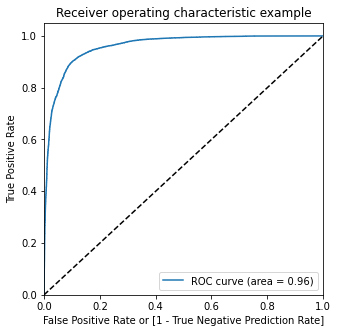

In [124]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point


In [125]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

Converted  Converted_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0  0          0.072868        0           1    0    0    0    0    0    0     
1  0          0.114003        0           1    1    0    0    0    0    0     
2  0          0.257565        0           1    1    1    0    0    0    0     
3  0          0.138576        0           1    1    0    0    0    0    0     
4  0          0.195707        0           1    1    0    0    0    0    0     

   0.7  0.8  0.9  
0  0    0    0    
1  0    0    0    
2  0    0    0    
3  0    0    0    
4  0    0    0

In [126]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0  0.0          0.500000  1.000000     0.000000   
0.1  0.1          0.784333  0.990370     0.578297   
0.2  0.2          0.856809  0.965577     0.748042   
0.3  0.3          0.890406  0.937981     0.842831   
0.4  0.4          0.898814  0.907151     0.890478   
0.5  0.5          0.893712  0.866044     0.921380   
0.6  0.6          0.881135  0.823572     0.938699   
0.7  0.7          0.867805  0.785914     0.949695   
0.8  0.8          0.858678  0.757456     0.959899   
0.9  0.9          0.839885  0.707438     0.972332   


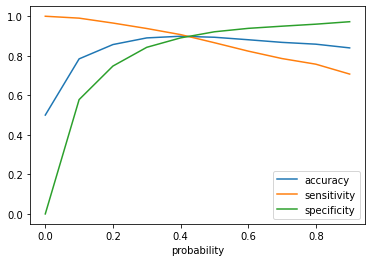

In [127]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**Initially we selected the optimm point of classification as 0.5.<br><br>From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.**

In [128]:
# Let's create columns with refined probability cutoffs 
numbers = [0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

Converted  Converted_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0  0          0.072868        0           1    0    0    0    0    0    0     
1  0          0.114003        0           1    1    0    0    0    0    0     
2  0          0.257565        0           1    1    1    0    0    0    0     
3  0          0.138576        0           1    1    0    0    0    0    0     
4  0          0.195707        0           1    1    0    0    0    0    0     

   0.7  0.8  0.9  0.41  0.42  0.43  0.44  0.45  0.46  0.47  0.48  0.49  
0  0    0    0    0     0     0     0     0     0     0     0     0     
1  0    0    0    0     0     0     0     0     0     0     0     0     
2  0    0    0    0     0     0     0     0     0     0     0     0     
3  0    0    0    0     0     0     0     0     0     0     0     0     
4  0    0    0    0     0     0     0     0     0     0     0     0

In [129]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.40  0.40         0.898814  0.907151     0.890478   
0.41  0.41         0.899677  0.904635     0.894718   
0.42  0.42         0.899569  0.900395     0.898742   
0.43  0.43         0.899677  0.897161     0.902192   
0.44  0.44         0.899820  0.894071     0.905570   
0.45  0.45         0.898670  0.888466     0.908875   
0.46  0.46         0.898167  0.883938     0.912397   
0.47  0.47         0.896946  0.878836     0.915056   
0.48  0.48         0.895688  0.874165     0.917212   
0.49  0.49         0.894790  0.869853     0.919727   


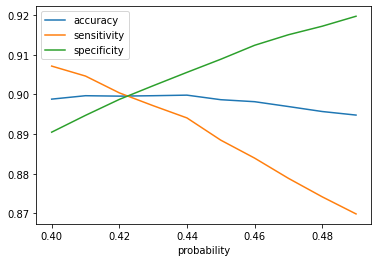

In [130]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at `0.54`**

In [131]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.43 else 0)

y_train_sm_pred_final.head()

Converted  Converted_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0  0          0.072868        0           1    0    0    0    0    0    0     
1  0          0.114003        0           1    1    0    0    0    0    0     
2  0          0.257565        0           1    1    1    0    0    0    0     
3  0          0.138576        0           1    1    0    0    0    0    0     
4  0          0.195707        0           1    1    0    0    0    0    0     

   0.7  0.8  0.9  0.41  0.42  0.43  0.44  0.45  0.46  0.47  0.48  0.49  \
0  0    0    0    0     0     0     0     0     0     0     0     0      
1  0    0    0    0     0     0     0     0     0     0     0     0      
2  0    0    0    0     0     0     0     0     0     0     0     0      
3  0    0    0    0     0     0     0     0     0     0     0     0      
4  0    0    0    0     0     0     0     0     0     0     0     0      

   final_churn_pred  
0  0                 
1  0                 
2  0                 
3  0                 
4  0

In [132]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8996766079770032


In [133]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[12554  1361]
 [ 1431 12484]]


In [134]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8971613366870284
Specificity =  0.9021918792669781
False Positive Rate =  0.09780812073302192
Precision =  0.9016973636691946
True Negative Prediction Rate =  0.8976760815159099


#### Precision and recall tradeoff

In [135]:
from sklearn.metrics import precision_recall_curve

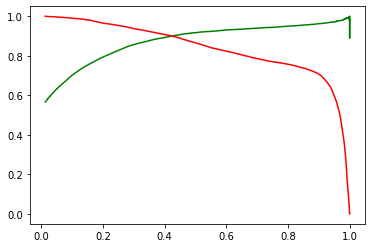

In [136]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

**Transforming and feature selection for test data**

In [137]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

id  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  \
26795  0.382767  0.005448     0.003166     0.004381      0.003661       
16173  0.231009  0.073550     0.154410     0.209079      0.050023       
21330  0.304688  0.014683     0.009988     0.021110      0.017269       
21021  0.300273  0.008132     0.007920     0.078550      0.061931       
29131  0.416142  0.018068     0.000080     0.156422      0.000984       

       roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  \
26795  0.000000       0.000000       0.000000       0.000000        
16173  0.000000       0.000000       0.000000       0.000000        
21330  0.037408       0.000000       0.040961       0.000000        
21021  0.000000       0.000000       0.000000       0.000000        
29131  0.126212       0.003947       0.328608       0.004336        

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
26795  0.006249          0.004326          0.006262          0.008035           
16173  0.084362          0.210976          0.294567          0.119761           
21330  0.004581          0.006956          0.006790          0.027312           
21021  0.009328          0.010620          0.111752          0.153208           
29131  0.000479          0.000000          0.001499          0.000000           

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
26795  0.000000          0.000000          0.00000           0.000000           
16173  0.013249          0.000000          0.00000           0.000000           
21330  0.000416          0.001570          0.04296           0.000218           
21021  0.004011          0.003189          0.00000           0.000000           
29131  0.000000          0.000000          0.00000           0.000000           

       loc_og_mou_6  loc_og_mou_7  std_og_t2m_mou_6  std_og_t2f_mou_6  \
26795  0.006540      0.007680      0.000000          0.0                
16173  0.181715      0.253887      0.002136          0.0                
21330  0.005789      0.018932      0.005796          0.0                
21021  0.055179      0.078433      0.000000          0.0                
29131  0.000952      0.000000      0.023864          0.0                

       std_og_t2f_mou_7  std_og_mou_6  std_og_mou_7  isd_og_mou_6  \
26795  0.0               0.000000      0.000000      0.0            
16173  0.0               0.001602      0.000239      0.0            
21330  0.0               0.006672      0.010332      0.0            
21021  0.0               0.000000      0.000596      0.0            
29131  0.0               0.017895      0.000000      0.0            

       spl_og_mou_6  spl_og_mou_7  og_others_6  og_others_7  total_og_mou_6  \
26795  0.000000      0.005767      0.0          0.0          0.006521         
16173  0.000000      0.015471      0.0          0.0          0.182319         
21330  0.019806      0.000089      0.0          0.0          0.011290         
21021  0.000000      0.003537      0.0          0.0          0.055020         
29131  0.000000      0.000000      0.0          0.0          0.013520         

       total_og_mou_7  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  \
26795  0.006599        0.072471          0.129950          0.075489           
16173  0.194555        0.015305          0.010559          0.123481           
21330  0.024516        0.008813          0.003158          0.018127           
21021  0.060449        0.019084          0.011698          0.074574           
29131  0.000000        0.001251          0.000000          0.005085           

       loc_ic_t2m_mou_7  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_mou_6  \
26795  0.091467          0.089465          0.054561          0.103383       
16173  0.037102          0.028374          0.005269          0.087723       
21330  0.029975          0.013734          0.028878          0.018422       
21021  0.054231          0.010606          0.011241          0.057580    

In [141]:
# Feature selection
X_test=X_test[rfe_columns_8]
X_test.head()

onnet_mou_6  offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_7  \
26795  0.005448     0.003661      0.000000       0.000000       0.000000        
16173  0.073550     0.050023      0.000000       0.000000       0.000000        
21330  0.014683     0.017269      0.037408       0.000000       0.000000        
21021  0.008132     0.061931      0.000000       0.000000       0.000000        
29131  0.018068     0.000984      0.126212       0.003947       0.004336        

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_7  loc_og_t2f_mou_7  \
26795  0.006249          0.004326          0.008035          0.000000           
16173  0.084362          0.210976          0.119761          0.000000           
21330  0.004581          0.006956          0.027312          0.001570           
21021  0.009328          0.010620          0.153208          0.003189           
29131  0.000479          0.000000          0.000000          0.000000           

       loc_og_t2c_mou_7  loc_og_mou_7  std_og_t2m_mou_6  std_og_t2f_mou_6  \
26795  0.000000          0.007680      0.000000          0.0                
16173  0.000000          0.253887      0.002136          0.0                
21330  0.000218          0.018932      0.005796          0.0                
21021  0.000000          0.078433      0.000000          0.0                
29131  0.000000          0.000000      0.023864          0.0                

       std_og_mou_6  spl_og_mou_7  total_og_mou_7  loc_ic_t2t_mou_6  \
26795  0.000000      0.005767      0.006599        0.072471           
16173  0.001602      0.015471      0.194555        0.015305           
21330  0.006672      0.000089      0.024516        0.008813           
21021  0.000000      0.003537      0.060449        0.019084           
29131  0.017895      0.000000      0.000000        0.001251           

       loc_ic_t2t_mou_7  loc_ic_t2m_mou_7  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
26795  0.129950          0.091467          0.089465          0.054561           
16173  0.010559          0.037102          0.028374          0.005269           
21330  0.003158          0.029975          0.013734          0.028878           
21021  0.011698          0.054231          0.010606          0.011241           
29131  0.000000          0.000000          0.000000          0.000000           

       loc_ic_mou_7  spl_ic_mou_6  isd_ic_mou_6  total_rech_num_7  \
26795  0.183451      0.120141      0.004857      0.094203           
16173  0.033566      0.000000      0.000000      0.333333           
21330  0.027677      0.000000      0.003109      0.021739           
21021  0.046524      0.081272      0.000000      0.086957           
29131  0.000000      0.000000      0.000000      0.014493           

       last_day_rch_amt_7  vol_2g_mb_7  vol_3g_mb_6  vol_3g_mb_7  \
26795  0.006452            0.027371     0.000000     0.0           
16173  0.009677            0.000000     0.000000     0.0           
21330  0.000000            0.000000     0.005317     0.0           
21021  0.041935            0.000000     0.000000     0.0           
29131  0.000000            0.000000     0.000000     0.0           

       monthly_2g_6  monthly_2g_7  sachet_2g_7  monthly_3g_6  sachet_3g_6  \
26795  0.00          0.0           0.125        0.0           0.0           
16173  0.00          0.0           0.000        0.0           0.0           
21330  0.25          0.0           0.000        0.0           0.0           
21021  0.00          0.0           0.000        0.0           0.0           
29131  0.00          0.0           0.000        0.0           0.0           

       sachet_3g_7  aug_vbc_3g  churn_probability  
26795  0.0          0.000000    0.0                
16173  0.0          0.006817    0.0                
21330  0.0          0.008701    0.0                
21021  0.0          0.000000    0.0                
29131  0.0          0.000000    0.0

In [142]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

**Predicting the target variable**

In [143]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 26795    0.007570
16173    0.001682
21330    0.097592
21021    0.062409
29131    0.577808
18003    0.459589
36731    0.008748
26380    0.026442
33080    0.173525
36799    0.510926
dtype: float64


In [144]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

0
26795  0.007570
16173  0.001682
21330  0.097592
21021  0.062409
29131  0.577808

In [145]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [146]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
26795  0    
16173  0    
21330  0    
21021  0    
29131  0

In [147]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

churn  Conv_prob
26795  0      0.007570 
16173  0      0.001682 
21330  0      0.097592 
21021  0      0.062409 
29131  0      0.577808

In [148]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.41 else 0)
y_pred_final.head()

churn  Conv_prob  test_churn_pred
26795  0      0.007570   0              
16173  0      0.001682   0              
21330  0      0.097592   0              
21021  0      0.062409   0              
29131  0      0.577808   1

In [149]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.9011738578680203

**Metrics Evaluation**

In [150]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[5399  579]
 [  44  282]]


In [151]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [152]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.8650306748466258
Specificity =  0.9031448645031783
False Positive Rate =  0.09685513549682168
Precision =  0.32752613240418116
True Negative Prediction Rate =  0.991916222671321


### Explaining the results

In [153]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  90.0 %
The sensitivity of the predicted model is:  87.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



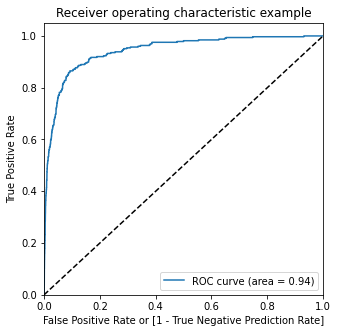

In [154]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

**The AUC score for train dataset is 0.96 and the test dataset is 0.94.<br> This model can be considered as a good model.**

<br>

#### Logistic Regression using PCA

In [156]:
##X_train.drop(['total_rech_data_group_7',
  #                'total_rech_num_group_7'], axis=1, inplace=True)

In [157]:
X_train.head()

id  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  \
28068  0.400954  0.004011     0.000409     0.035526      0.018057       
34320  0.490278  0.024694     0.011582     0.097408      0.117076       
47685  0.681225  0.008897     0.032905     0.012989      0.041636       
15402  0.219993  0.020468     0.012983     0.017197      0.011526       
24936  0.356207  0.107445     0.098114     0.007170      0.014195       

       roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  \
28068  0.000000       0.000000       0.000000       0.000000        
34320  0.000000       0.003907       0.000000       0.003312        
47685  0.006452       0.000000       0.015532       0.000000        
15402  0.010156       0.000000       0.003681       0.000000        
24936  0.000000       0.000000       0.000000       0.000000        

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
28068  0.004601          0.000559          0.045081          0.041094           
34320  0.005136          0.003841          0.131995          0.276433           
47685  0.001284          0.001928          0.012787          0.075646           
15402  0.004537          0.002224          0.022368          0.027805           
24936  0.034551          0.035794          0.007518          0.026438           

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
28068  0.000000          0.000000          0.021965          0.003618           
34320  0.000516          0.001079          0.000000          0.000000           
47685  0.000000          0.000000          0.000000          0.000000           
15402  0.003046          0.001153          0.017504          0.001918           
24936  0.004927          0.005924          0.000000          0.000000           

       loc_og_mou_6  loc_og_mou_7  std_og_t2m_mou_6  std_og_t2f_mou_6  \
28068  0.022675      0.018749      0.000000          0.000000           
34320  0.061382      0.126323      0.005876          0.000875           
47685  0.006420      0.035364      0.000592          0.000000           
15402  0.012785      0.014593      0.000491          0.000000           
24936  0.024474      0.046558      0.001597          0.001368           

       std_og_t2f_mou_7  std_og_mou_6  std_og_mou_7  isd_og_mou_6  \
28068  0.000000          0.000000      0.000483      0.0            
34320  0.002062          0.024370      0.014817      0.0            
47685  0.000000          0.004719      0.041648      0.0            
15402  0.000000          0.015349      0.011444      0.0            
24936  0.001654          0.077384      0.074591      0.0            

       spl_og_mou_6  spl_og_mou_7  og_others_6  og_others_7  total_og_mou_6  \
28068  0.059755      0.007980      0.000000     0.0          0.025115         
34320  0.000000      0.000071      0.000000     0.0          0.078325         
47685  0.001855      0.001253      0.002837     0.0          0.009957         
15402  0.008070      0.001982      0.000000     0.0          0.023870         
24936  0.000000      0.000809      0.000000     0.0          0.078764         

       total_og_mou_7  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  \
28068  0.015755        0.011444          0.007004          0.059379           
34320  0.110234        0.008286          0.000751          0.024111           
47685  0.067940        0.002619          0.000881          0.009989           
15402  0.022582        0.002230          0.003046          0.012793           
24936  0.108780        0.002484          0.004827          0.015678           

       loc_ic_t2m_mou_7  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_mou_6  \
28068  0.035247          0.000000          0.000000          0.042152       
34320  0.016739          0.001692          0.001192          0.019549       
47685  0.025895          0.000000          0.000510          0.007497       
15402  0.014194          0.001216          0.001371          0.009161    

In [158]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

X_train.drop(['total_rech_data_group_7',
                  'total_rech_num_group_7'], axis=1, inplace=True)

# apply scaling on the dataset

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (14709, 101)
Dimension of X_test: (6304, 101)
Dimension of X_train_sm Shape: (27830, 99)
Dimension of y_train_sm Shape: (27830,)


id  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  \
0  0.400954  0.004011     0.000409     0.035526      0.018057       
1  0.490278  0.024694     0.011582     0.097408      0.117076       
2  0.681225  0.008897     0.032905     0.012989      0.041636       
3  0.219993  0.020468     0.012983     0.017197      0.011526       
4  0.356207  0.107445     0.098114     0.007170      0.014195       

   roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  \
0  0.000000       0.000000       0.000000       0.000000        
1  0.000000       0.003907       0.000000       0.003312        
2  0.006452       0.000000       0.015532       0.000000        
3  0.010156       0.000000       0.003681       0.000000        
4  0.000000       0.000000       0.000000       0.000000        

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0  0.004601          0.000559          0.045081          0.041094           
1  0.005136          0.003841          0.131995          0.276433           
2  0.001284          0.001928          0.012787          0.075646           
3  0.004537          0.002224          0.022368          0.027805           
4  0.034551          0.035794          0.007518          0.026438           

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0  0.000000          0.000000          0.021965          0.003618           
1  0.000516          0.001079          0.000000          0.000000           
2  0.000000          0.000000          0.000000          0.000000           
3  0.003046          0.001153          0.017504          0.001918           
4  0.004927          0.005924          0.000000          0.000000           

   loc_og_mou_6  loc_og_mou_7  std_og_t2m_mou_6  std_og_t2f_mou_6  \
0  0.022675      0.018749      0.000000          0.000000           
1  0.061382      0.126323      0.005876          0.000875           
2  0.006420      0.035364      0.000592          0.000000           
3  0.012785      0.014593      0.000491          0.000000           
4  0.024474      0.046558      0.001597          0.001368           

   std_og_t2f_mou_7  std_og_mou_6  std_og_mou_7  isd_og_mou_6  spl_og_mou_6  \
0  0.000000          0.000000      0.000483      0.0           0.059755       
1  0.002062          0.024370      0.014817      0.0           0.000000       
2  0.000000          0.004719      0.041648      0.0           0.001855       
3  0.000000          0.015349      0.011444      0.0           0.008070       
4  0.001654          0.077384      0.074591      0.0           0.000000       

   spl_og_mou_7  og_others_6  og_others_7  total_og_mou_6  total_og_mou_7  \
0  0.007980      0.000000     0.0          0.025115        0.015755         
1  0.000071      0.000000     0.0          0.078325        0.110234         
2  0.001253      0.002837     0.0          0.009957        0.067940         
3  0.001982      0.000000     0.0          0.023870        0.022582         
4  0.000809      0.000000     0.0          0.078764        0.108780         

   loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  \
0  0.011444          0.007004          0.059379          0.035247           
1  0.008286          0.000751          0.024111          0.016739           
2  0.002619          0.000881          0.009989          0.025895           
3  0.002230          0.003046          0.012793          0.014194           
4  0.002484          0.004827          0.015678          0.020621           

   loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_mou_6  loc_ic_mou_7  \
0  0.000000          0.000000          0.042152      0.028135       
1  0.001692          0.001192          0.019549      0.011347       
2  0.000000          0.000510          0.007497      0.017015       
3  0.001216          0.001371          0.009161      0.011827       
4  0.003505          0.000108          0.011440      0.017128       

   std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_

In [159]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [160]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)


X_test.drop(['total_rech_data_group_7',
                  'total_rech_num_group_7'], axis=1, inplace=True)


X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (27830, 99)
Dimension of X_test_pca:  (6304, 99)


In [161]:
#Viewing the PCA components
pca.components_

array([[-2.92904946e-03, -3.09873675e-02, -8.89970733e-03, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.13095673e-02, -2.56492323e-02, -2.78342908e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-9.99412118e-01,  3.65936855e-03, -7.70487534e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  6.94434973e-16, -2.07582933e-15, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

#### Performing Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (6304, 1)


In [163]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[5611  367]
 [  68  258]] 

Accuracy of the logistic regression model with PCA:  0.930996192893401


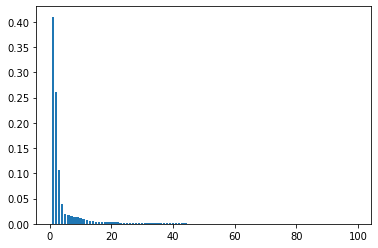

In [164]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

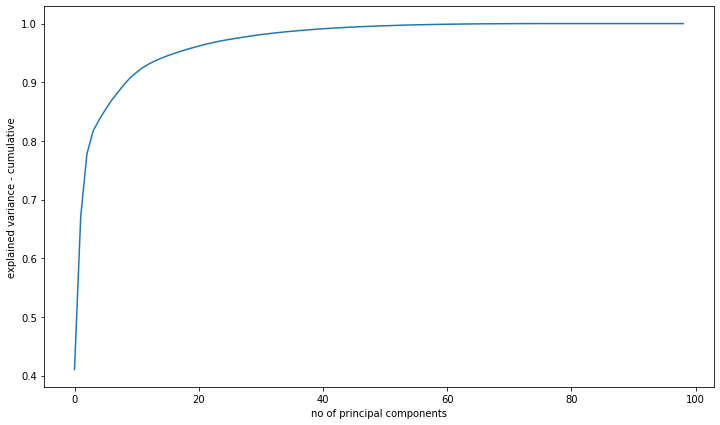

In [165]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [166]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([41. , 67.1, 77.8, 81.7, 83.7, 85.4, 87. , 88.3, 89.6, 90.8, 91.7,
       92.5, 93.1, 93.6, 94. , 94.4, 94.8, 95.1, 95.4, 95.7, 96. , 96.3,
       96.5, 96.7, 96.9, 97.1, 97.3, 97.5, 97.7, 97.9, 98. , 98.1, 98.2,
       98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1, 99.2, 99.3,
       99.4, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5,
       99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5,
       99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5,
       99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5,
       99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5])

 **90% of the data can be explained with 8 PCA components*

**Fitting the dataset with the 8 explainable components**

In [167]:
pca_8 = PCA(n_components=15)

train_pca_8 = pca_8.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_8.shape)

test_pca_8 = pca_8.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_8.shape)

Dimension for Train dataset using PCA:  (27830, 15)
Dimension for Test dataset using PCA:  (6304, 15)


In [168]:
logreg_pca_8 = LogisticRegression()
logreg_pca_8.fit(train_pca_8, y_train_sm)

# making the predictions
y_pred_8 = logreg_pca_8.predict(test_pca_8)

# converting the prediction into a dataframe
y_pred_df_8 = pd.DataFrame(y_pred_8)
print("Dimension of y_pred_df_8: ", y_pred_df_8.shape)

Dimension of y_pred_df_8:  (6304, 1)


In [169]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred_8),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred_8))

Confusion Matirx for y_test & y_pred
 [[5605  373]
 [  75  251]] 

Accuracy of the logistic regression model with PCA:  0.9289340101522843


In [ ]:
# df_pca = pd.DataFrame(newdata, columns=["PC1", "PC2"])
# df.head()

In [ ]:
# Creating a submssion file

In [170]:
sample = pd.read_csv("sample.csv")

In [171]:
sample

id  churn_probability
0      69999  0                
1      70000  0                
2      70001  0                
3      70002  0                
4      70003  0                
5      70004  0                
6      70005  0                
7      70006  0                
8      70007  0                
9      70008  0                
10     70009  0                
11     70010  0                
12     70011  0                
13     70012  0                
14     70013  0                
15     70014  0                
16     70015  0                
17     70016  0                
18     70017  0                
19     70018  0                
20     70019  0                
21     70020  0                
22     70021  0                
23     70022  0                
24     70023  0                
25     70024  0                
26     70025  0                
27     70026  0                
28     70027  0                
29     70028  0                
30     70029  0                
31     70030  0                
32     70031  0                
33     70032  0                
34     70033  0                
35     70034  0                
36     70035  0                
37     70036  0                
38     70037  0                
39     70038  0                
40     70039  0                
41     70040  0                
42     70041  0                
43     70042  0                
44     70043  0                
45     70044  0                
46     70045  0                
47     70046  0                
48     70047  0                
49     70048  0                
50     70049  0                
51     70050  0                
52     70051  0                
53     70052  0                
54     70053  0                
55     70054  0                
56     70055  0                
57     70056  0                
58     70057  0                
59     70058  0                
60     70059  0                
61     70060  0                
62     70061  0                
63     70062  0                
64     70063  0                
65     70064  0                
66     70065  0                
67     70066  0                
68     70067  0                
69     70068  0                
70     70069  0                
71     70070  0                
72     70071  0                
73     70072  0                
74     70073  0                
75     70074  0                
76     70075  0                
77     70076  0                
78     70077  0                
79     70078  0                
80     70079  0                
81     70080  0                
82     70081  0                
83     70082  0                
84     70083  0                
85     70084  0                
86     70085  0                
87     70086  0                
88     70087  0                
89     70088  0                
90     70089  0                
91     70090  0                
92     70091  0                
93     70092  0                
94     70093  0                
95     70094  0                
96     70095  0                
97     70096  0                
98     70097  0                
99     70098  0                
100    70099  0                
101    70100  0                
102    70101  0                
103    70102  0                
104    70103  0                
105    70104  0                
106    70105  0                
107    70106  0                
108    70107  0                
109    70108  0                
110    70109  0                
111    70110  0                
112    70111  0                
113    70112  0                
114    70113  0                
115    70114  0                
116    70115  0                
117    70116  0                
118    70117  0                
119    70118  0                
120    70119  0                
121    70120  0                
122    70121  0                
123    70122  0                
124    701

In [172]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps = [('imputation',knn),
                         ('scaling',scalar),
                         ('pca',pca),
                         ('model',logreg)])

In [173]:
 unseen = pd.read_csv("test.csv")

In [197]:
unseen.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999  109        0.0             0.0             0.0              
1  70000  109        0.0             0.0             0.0              
2  70001  109        0.0             0.0             0.0              
3  70002  109        0.0             0.0             0.0              
4  70003  109        0.0             0.0             0.0              

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0  6/30/2014            7/31/2014            8/31/2014            91.882    
1  6/30/2014            7/31/2014            8/31/2014            414.168   
2  6/30/2014            7/31/2014            8/31/2014            329.844   
3  6/30/2014            7/31/2014            8/31/2014            43.550    
4  6/30/2014            7/31/2014            8/31/2014            306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  65.330   64.445   31.78        20.23        23.11        60.16          
1  515.568  360.868  75.51        41.21        19.84        474.34         
2  434.884  746.239  7.54         7.86         8.40         16.98          
3  171.390  24.400   5.31         2.16         0.00         40.04          
4  406.289  413.329  450.93       609.03       700.68       60.94          

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0  32.16         34.83         0.00           0.00           0.00            
1  621.84        394.94        0.00           0.00           0.00            
2  45.81         45.04         22.81          103.38         26.08           
3  205.01        24.01         0.00           0.00           0.00            
4  23.84         74.16         0.00           0.00           0.00            

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0  0.00           0.00           0.00           24.88              
1  0.00           0.00           0.00           75.51              
2  24.53          53.68          54.44          0.00               
3  0.00           0.00           0.00           5.31               
4  0.00           0.00           0.00           0.45               

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0  20.23             21.06             18.13             10.89              
1  41.21             19.84             473.61            598.08             
2  0.00              0.00              0.00              0.00               
3  0.00              0.00              2.94              98.61              
4  0.78              14.56             2.39              2.66               

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0  8.36              0.00              13.58             0.00               
1  377.26            0.73              0.00              0.00               
2  0.00              0.00              0.00              0.00               
3  20.51             0.00              0.00              2.35               
4  10.94             0.00              0.00              0.00               

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0  0.0               0.00              0.03              43.01          
1  0.0               0.00              0.00              549.86         
2  0.0               0.00              0.00              0.00           
3  0.0               6.18              0.00              8.26           
4  0.0               0.00              0.00              2.84           

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0  44.71         29.43         6.90              0.00               
1  639.29        397.11        0.00              0.00               
2  0.00          0.00          0.00              0.00               
3  98.61         22.86         0.00              2.16               
4  3.44          25.51         450.48            608.24             

 

In [203]:
rfe_columns_8=rfe_columns_8.drop('churn_probability',1)
submission_data = unseen.set_index('id')[rfe_columns_8]

submission_data.head()

onnet_mou_6  offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_7  \
id                                                                              
69999  31.78        32.16         0.00           0.00           0.00            
70000  75.51        621.84        0.00           0.00           0.00            
70001  7.54         45.81         22.81          103.38         53.68           
70002  5.31         205.01        0.00           0.00           0.00            
70003  450.93       23.84         0.00           0.00           0.00            

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_7  loc_og_t2f_mou_7  \
id                                                                              
69999  24.88             20.23             10.89             13.58              
70000  75.51             41.21             598.08            0.00               
70001  0.00              0.00              0.00              0.00               
70002  5.31              0.00              98.61             0.00               
70003  0.45              0.78              2.66              0.00               

       loc_og_t2c_mou_7  loc_og_mou_7  std_og_t2m_mou_6  std_og_t2f_mou_6  \
id                                                                          
69999  0.00              44.71         42.03             0.0                
70000  0.00              639.29        0.00              0.0                
70001  0.00              0.00          0.00              0.0                
70002  6.18              98.61         37.09             0.0                
70003  0.00              3.44          58.54             0.0                

       std_og_mou_6  spl_og_mou_7  total_og_mou_7  loc_ic_t2t_mou_6  \
id                                                                    
69999  48.93         0.00          52.39           30.33              
70000  0.00          0.00          663.06          19.99              
70001  0.00          0.00          0.00            0.00               
70002  37.09         12.03         207.18          58.11              
70003  509.03        5.39          638.28          0.00               

       loc_ic_t2t_mou_7  loc_ic_t2m_mou_7  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
id                                                                              
69999  37.56             4.59              0.26              0.00               
70000  26.95             122.29            1.49              0.00               
70001  0.00              0.00              0.00              0.00               
70002  54.64             449.83            0.00              0.38               
70003  0.36              9.23              0.00              0.00               

       loc_ic_mou_7  spl_ic_mou_6  isd_ic_mou_6  total_rech_num_7  \
id                                                                  
69999  42.16         0.54          0.00          5                  
70000  149.24        0.00          114.63        4                  
70001  0.00          0.00          0.00          9                  
70002  504.86        0.00          0.00          5                  
70003  9.59          0.00          0.00          7                  

       last_day_rch_amt_7  vol_2g_mb_7  vol_3g_mb_6  vol_3g_mb_7  \
id                                                                 
69999  30                  0.0          0.0          0.0           
70000  0                   0.0          0.0          0.0           
70001  0                   0.0          0.0          0.0           
70002  150                 0.0          0.0          0.0           
70003  130                 0.0          0.0          0.0           

       monthly_2g_6  monthly_2g_7  sachet_2g_7  monthly_3g_6  sachet_3g_6  \
id                                                                          
69999  0             0             0            0             0             
70000  0             0             0            0             0          

ValueError: X has 36 features, but SimpleImputer is expecting 140 features as input.